In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.getcwd())

C:\Users\saadi\Documents\Cambridge\ithim


In [3]:
# Read in SP and tripGen info

sp= pd.read_csv("datasets/bogotaSP1.csv")
sp["sex_Male"] = (sp["p.female"]==0)
sp.head()

,p.age_gr,p.female,p.status,p.age_gr_1,p.age_gr_2,p.age_gr_3,p.age_gr_4,p.age_gr_5,p.age_gr_6,p.age_gr_7,...,p.age_gr_9,p.status_employed,p.status_retired,p.status_student,p.status_unemployed,predictedHBmandatory,predictedHBdiscretionary,predictedNHB,Total,sex_Male
0,1,0,student,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,True
1,1,0,student,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2,5,9,True
2,1,0,student,1,0,0,0,0,0,0,...,0,0,0,1,0,0,6,1,13,True
3,1,0,student,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,3,True
4,1,0,student,1,0,0,0,0,0,0,...,0,0,0,1,0,0,7,1,15,True


In [4]:
# global indicators

indicators = pd.read_csv("datasets/indicators.csv")

In [5]:
indicators.columns

# local climate zones - classification (satellite data) compact/open/ green space ...

Index(['country', 'country_iso', 'core_city', 'uc_id', 'circuity', 'k_avg',
       'length_mean', 'length_median', 'length_total', 'street_segment_count',
       'node_count', 'orientation_entropy', 'prop_4way', 'prop_3way',
       'prop_deadend', 'self_loop_proportion', 'straightness', 'bc_gini',
       'bc_max', 'cc_avg_dir', 'cc_wt_avg_dir', 'pagerank_max', 'cc_avg_undir',
       'cc_wt_avg_undir', 'elev_iqr', 'elev_mean', 'elev_median', 'elev_range',
       'elev_std', 'grade_mean', 'grade_median', 'intersect_count',
       'intersect_count_clean', 'intersect_count_clean_topo', 'uc_names',
       'world_region', 'resident_pop', 'area_km2', 'built_up_area_m2'],
      dtype='object')

In [396]:
df[df.city_name_iso=="bogota"].

,participant_id,age,sex,trip_id,trip_mode,trip_duration,city_name,trip_new_mode,car_share,cycling_share,...,intersect_count_clean,intersect_count_clean_topo,uc_names,world_region,resident_pop,area_km2,built_up_area_m2,p.age_gr,age_group_label,sex_Male
369420,100011,55.0,Female,1.000111e+06,bus,30.0,bogota_wb,pt,0.192128,0.090432,...,49189,49779,Bogota; Soacha,Latin America and the Caribbean,10419360,534,151981840,7,50-59,False
369421,100011,55.0,Female,1.000112e+06,bus,150.0,bogota_wb,pt,0.192128,0.090432,...,49189,49779,Bogota; Soacha,Latin America and the Caribbean,10419360,534,151981840,7,50-59,False
369422,100012,31.0,Female,1.000121e+06,bus,45.0,bogota_wb,pt,0.192128,0.090432,...,49189,49779,Bogota; Soacha,Latin America and the Caribbean,10419360,534,151981840,6,30-49,False
369423,100012,31.0,Female,1.000122e+06,bus,60.0,bogota_wb,pt,0.192128,0.090432,...,49189,49779,Bogota; Soacha,Latin America and the Caribbean,10419360,534,151981840,6,30-49,False
369424,100031,81.0,Male,1.000311e+06,bus,60.0,bogota_wb,pt,0.192128,0.090432,...,49189,49779,Bogota; Soacha,Latin America and the Caribbean,10419360,534,151981840,9,70+,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475506,1000087123,25.0,Male,1.000087e+10,car,60.0,bogota_wb,car,0.192128,0.090432,...,49189,49779,Bogota; Soacha,Latin America and the Caribbean,10419360,534,151981840,5,18-29,True
475507,1000087124,19.0,Male,1.000087e+10,other,50.0,bogota_wb,other,0.192128,0.090432,...,49189,49779,Bogota; Soacha,Latin America and the Caribbean,10419360,534,151981840,5,18-29,True
475508,1000087124,19.0,Male,1.000087e+10,other,55.0,bogota_wb,other,0.192128,0.090432,...,49189,49779,Bogota; Soacha,Latin America and the Caribbean,10419360,534,151981840,5,18-29,True
475509,1000087151,71.0,Male,1.000087e+10,car,80.0,bogota_wb,car,0.192128,0.090432,...,49189,49779,Bogota; Soacha,Latin America and the Caribbean,10419360,534,151981840,9,70+,True


In [6]:
# 2,609,840 trips / 890,908 unique participants / 28 cities
df=pd.read_csv("merge_data.csv", low_memory=False)

#
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["trip_duration"] = pd.to_numeric(df["trip_duration"], errors="coerce")

# Remove mexico_city_WeekAndSaturday
df= df[df["city_name"]!="mexico_city_WeekAndSaturday"]

In [7]:
city_to_country = {
    'accra-': 'ghana',
    'antofagasta': 'chile',
    'arica': 'chile',
    'bangalore': 'india',
    'belo_horizonte': 'brazil',
    'bogota_wb': 'colombia',
    'buenos_aires': 'argentina',
    'cali': 'colombia',
    'cape_town': 'south_africa',
    'copiapo': 'chile',
    'coquimbo_laserena': 'chile',
    'delhi': 'india',
    'gran_valparaiso': 'chile',
    'iquique_altohospicio': 'chile',
    'kisumu': 'kenya',
    'medellin': 'colombia',
    'mexico_city_WeekAndSaturday': 'mexico',  # Fixed typo from original input
    'montevideo': 'uruguay',
    'nairobi': 'kenya',
    'osorno': 'chile',
    'port_louis': 'mauritius',
    'puerto_montt': 'chile',
    'santiago_regular_summer_season': 'chile',
    'san_antonio': 'chile',
    'sao_paulo': 'brazil',
    'temuco_padrelascasas': 'chile',
    'valdivia': 'chile',
    'vizag': 'india'
}

df['country'] = df['city_name'].map(city_to_country)

In [8]:
cityOld_to_cityNew = {
    'accra-': 'accra',
    'antofagasta': 'antofagasta',
    'arica': 'arica',
    'bangalore': 'bengaluru', #
    'belo_horizonte': 'belo_horizonte',
    'bogota_wb': 'bogota',
    'buenos_aires': 'buenos_aires',
    'cali': 'cali',
    'cape_town': 'cape_town',
    'copiapo': 'copiapo',
    'coquimbo_laserena': 'coquimbo',
    'delhi': 'new_delhi',
    'gran_valparaiso': 'valparaiso',
    'iquique_altohospicio': 'iquique',
    'kisumu': 'kisumu',
    'medellin': 'medellin',
    'mexico_city_WeekAndSaturday': 'mexico_city',  # Fixed typo from original input
    'montevideo': 'montevideo',
    'nairobi': 'nairobi',
    'osorno': 'osorno',
    'port_louis': 'port_louis',
    'puerto_montt': 'puerto_montt',
    'santiago_regular_summer_season': 'santiago',
    'san_antonio': 'san_antonio',
    'sao_paulo': 'sao_paulo',
    'temuco_padrelascasas': 'temuco',
    'valdivia': 'valdivia',
    'vizag': 'visakhapatnam'
}

df["city_name_iso"]=df["city_name"].map(cityOld_to_cityNew)

In [362]:
# utils to do the search for the mapping
# n_cities = [city for city in sorted(set(subset_indicators["core_city"].values)) if city.startswith('b')]
# set(n_cities)

In [9]:
df["new_participant_id"] = df["city_name"] + "_" + df["participant_id"].astype(str) + "_" + df["sex"]
df["new_trip_id"] = df["new_participant_id"] + "_" + df["trip_id"].astype(str)

In [10]:
# todo: ask Lambed about how they dealt with people who didn't make trips in the single survey

df.head()

,participant_id,age,sex,trip_id,trip_mode,trip_duration,city_name,trip_new_mode,car_share,cycling_share,...,public_transport_share,walking_share,City_name,population,GDP,city_size,country,city_name_iso,new_participant_id,new_trip_id
0,1,36.0,Male,1.0,bus,60.0,accra-,public transport,0.148904,0.021027,...,0.282371,0.547698,Accra,240,380,225,ghana,accra,accra-_1_Male,accra-_1_Male_1.0
1,1,36.0,Male,2.0,bus,30.0,accra-,public transport,0.148904,0.021027,...,0.282371,0.547698,Accra,240,380,225,ghana,accra,accra-_1_Male,accra-_1_Male_2.0
2,1,36.0,Male,3.0,bus,30.0,accra-,public transport,0.148904,0.021027,...,0.282371,0.547698,Accra,240,380,225,ghana,accra,accra-_1_Male,accra-_1_Male_3.0
3,1,36.0,Male,4.0,bus,60.0,accra-,public transport,0.148904,0.021027,...,0.282371,0.547698,Accra,240,380,225,ghana,accra,accra-_1_Male,accra-_1_Male_4.0
4,1,36.0,Male,5.0,taxi,60.0,accra-,car,0.148904,0.021027,...,0.282371,0.547698,Accra,240,380,225,ghana,accra,accra-_1_Male,accra-_1_Male_5.0


In [11]:
df["trip_mode"].value_counts()

# Create a mapping dictionary for recategorization
mode_mapping = {
    'bus': 'pt',
    'pedestrian': 'walk',
    'car': 'car',
    'rail': 'pt',
    'taxi': 'car',
    'motorcycle': 'motorcycle',
    'cycle': 'bike',
    'other': 'other',
    'auto_rickshaw': 'other',
    'truck': 'other'
}

df['trip_new_mode'] = df['trip_mode'].map(mode_mapping)

In [12]:
df['trip_new_mode'].value_counts()

trip_new_mode
pt            546521
car           479647
walk          366951
motorcycle     61743
bike           28648
other          17034
Name: count, dtype: int64

In [367]:
# cities in the dataset

df["city_name_iso"].unique()

array(['accra', 'antofagasta', 'arica', 'bengaluru', 'belo_horizonte',
       'bogota', 'buenos_aires', 'cali', 'cape_town', 'copiapo',
       'coquimbo', 'new_delhi', 'valparaiso', 'iquique', 'kisumu',
       'medellin', 'montevideo', 'nairobi', 'osorno', 'port_louis',
       'puerto_montt', 'santiago', 'san_antonio', 'sao_paulo', 'temuco',
       'valdivia', 'visakhapatnam'], dtype=object)

In [13]:
df= pd.merge(df, indicators, left_on='city_name_iso', right_on='core_city', how='left')

In [14]:
# List of columns to check
columns_to_check = [
    'age',
    'sex',
    'trip_mode',
    'trip_duration',
    'trip_new_mode',
    'car_share', 
    'cycling_share', 
    'other_share', 
    'public_transport_share', 
    'walking_share', 
    'population', 
    'GDP', 
    'city_size'
]

# Check for NaN values in the specified columns
nan_counts = df[columns_to_check].isna().sum()

# Print the results
print("NaN counts in each column:")
print("##########################")
print(nan_counts)
print("##########################")

NaN counts in each column:
##########################
age                         1982
sex                         1325
trip_mode                 193054
trip_duration             194470
trip_new_mode             193054
car_share                      0
cycling_share                  0
other_share                    0
public_transport_share         0
walking_share                  0
population                     0
GDP                            0
city_size                      0
dtype: int64
##########################


In [223]:
# Define the bin edges (note these are the lower bounds of each group)
bins = [0, 5, 11, 16, 18, 30, 50, 60, 70, 125]  # 125 as upper limit

# Define the corresponding labels
labels = [
    "0-4",
    "5-10",
    "11-15",
    "16-17",
    "18-29",
    "30-49",
    "50-59",
    "60-69",
    "70+"
]

# Define the corresponding category numbers
category_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # 1=0-4, 2=5-10, ..., 9=70+

# Assign age group categories
df["p.age_gr"] = pd.cut(
    df["age"],
    bins=bins,
    labels=category_numbers,
    right=False
)

# Optional: Also keep the original labels if needed
df["age_group_label"] = pd.cut(
    df["age"],
    bins=bins,
    labels=labels,
    right=False
)

In [224]:
stats_before = df.shape

df_filtered= df.copy()

df_filtered= df_filtered.dropna(subset=['trip_duration'])
df_filtered= df_filtered[df_filtered["trip_duration"]!=0]
df_filtered= df_filtered.dropna(subset=['age'])
df_filtered= df_filtered.dropna(subset=['sex'])
df_filtered= df_filtered.dropna(subset=['trip_new_mode'])

df_filtered = df_filtered[df_filtered['trip_duration'] <= 360]
df_filtered = df_filtered[df_filtered['age'] <= 100]

print("Nb of rows removed: " + str(stats_before[0]- df_filtered.shape[0]))

Nb of rows removed: 201539


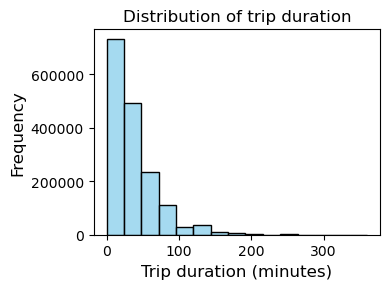

In [16]:
plt.figure(figsize=(4, 3))

# Plot a histogram with KDE overlay
sns.histplot(df_filtered['trip_duration'], kde=False, color='skyblue', bins=15)

# Add labels and title
plt.xlabel("Trip duration (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of trip duration", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

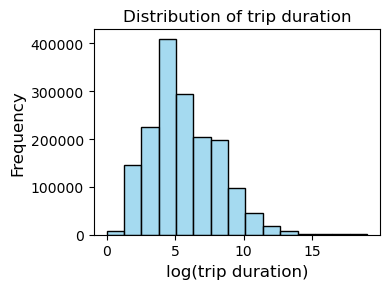

In [17]:
df_filtered['sqrt_trip_duration'] = np.sqrt(df_filtered['trip_duration'])

plt.figure(figsize=(4, 3))

# Plot a histogram with KDE overlay
sns.histplot(df_filtered['sqrt_trip_duration'], kde=False, color='skyblue', bins=15)

# Add labels and title
plt.xlabel("log(trip duration)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of trip duration", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

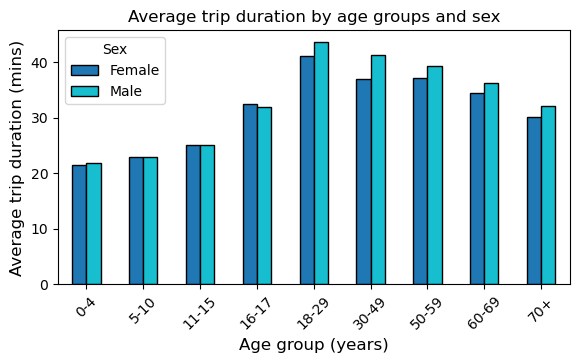

In [229]:
# Compute average trip duration grouped by age_group and sex
# if city-specific: df_filtered[df_filtered["city_name_iso"]=="bogota"]
avg_trip_duration = df_filtered.groupby(["age_group_label", "sex"], observed=True)["trip_duration"].mean().unstack()

# Create figure and axis
scale=1.1
fig, ax = plt.subplots(figsize=(6*scale, 3*scale))

# Plot grouped bar chart
avg_trip_duration.plot(kind="bar", ax=ax, colormap="tab10", edgecolor="black")

# Formatting
ax.set_xlabel("Age group (years)", fontsize=12)
ax.set_ylabel("Average trip duration (mins)", fontsize=12)
ax.set_title("Average trip duration by age groups and sex", fontsize=12)

ax.set_xticklabels(avg_trip_duration.index, rotation=45)  # Rotate x-axis labels
ax.legend(title="Sex", fontsize=10)

# Add grid lines for better readability
# ax.grid(axis="y", alpha=0.7)

# Show the plot
plt.show()

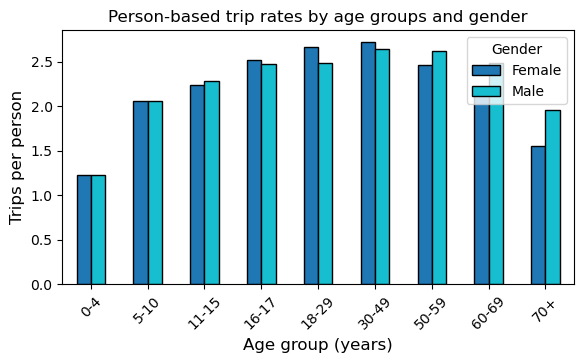

In [227]:
# Trip rates by age and gender

scale= 1.1

# Step 1: Calculate the total number of trips by age group and gender
trips_per_person = df_filtered.groupby(["age_group_label", "sex"], observed=True)["new_trip_id"].count()

# Step 2: Calculate the total number of participants (unique participant_id) by age group and gender
people_per_group = df.groupby(["age_group_label", "sex"], observed=True)["new_participant_id"].nunique()

# Step 3: Calculate person-based trip rates by dividing the total trips by the total people for each group
trip_rate = trips_per_person / people_per_group

# Convert trip_rate to a DataFrame for easy plotting
trip_rate_df = trip_rate.unstack()

# Plot a side-by-side bar chart
ax = trip_rate_df.plot(kind="bar", figsize=(6*scale, 3*scale), colormap="tab10", edgecolor="black", legend=False)

# Formatting the plot
ax.set_xlabel("Age group (years)", fontsize=12)
ax.set_ylabel("Trips per person", fontsize=12)
ax.set_title("Person-based trip rates by age groups and gender", fontsize=12)
ax.set_xticklabels(trip_rate_df.index, rotation=45)  # Rotate x-axis labels for better readability
ax.legend(title="Gender", fontsize=10)

plt.show()

In [130]:
# # Assuming 'trip_distance' is the column for distance and 'trip_mode' for the transportation mode
# # If 'trip_distance' is not in your dataframe, replace it with the appropriate column name for distance

# plt.figure(figsize=(6*scale, 3*scale))
# sns.boxplot(x="trip_mode", y="trip_duration", data=df_filtered, palette="Set2")

# # Formatting the plot
# plt.xlabel("Trip Mode", fontsize=12)
# plt.ylabel("Trip Distance (km)", fontsize=12)
# plt.title("Trip Distance Distributions by Mode", fontsize=12)
# plt.xticks(rotation=45)
# plt.ylim(0, 200)

# plt.show()

In [31]:
df_filtered.columns

Index(['participant_id', 'age', 'sex', 'trip_id', 'trip_mode', 'trip_duration',
       'city_name', 'trip_new_mode', 'car_share', 'cycling_share',
       'other_share', 'public_transport_share', 'walking_share', 'City_name',
       'population', 'GDP', 'city_size', 'country_x', 'city_name_iso',
       'new_participant_id', 'new_trip_id', 'country_y', 'country_iso',
       'core_city', 'uc_id', 'circuity', 'k_avg', 'length_mean',
       'length_median', 'length_total', 'street_segment_count', 'node_count',
       'orientation_entropy', 'prop_4way', 'prop_3way', 'prop_deadend',
       'self_loop_proportion', 'straightness', 'bc_gini', 'bc_max',
       'cc_avg_dir', 'cc_wt_avg_dir', 'pagerank_max', 'cc_avg_undir',
       'cc_wt_avg_undir', 'elev_iqr', 'elev_mean', 'elev_median', 'elev_range',
       'elev_std', 'grade_mean', 'grade_median', 'intersect_count',
       'intersect_count_clean', 'intersect_count_clean_topo', 'uc_names',
       'world_region', 'resident_pop', 'area_km2', 'built

In [314]:
df_encoded = pd.get_dummies(
    df_filtered[[
        # Demographic and trip features
        'p.age_gr',
        'sex',
        'trip_duration',
        
        # Macro indicators
        'GDP',
        'population',
        'city_size',
        
        # Transport mode shares
        'public_transport_share',
        'cycling_share',
        'car_share',
        'walking_share',
        
        # # Network topology metrics
        # 'circuity',
        # 'k_avg',
        # 'length_mean',
        # 'length_median',
        # 'length_total',
        # 'street_segment_count',
        # 'node_count',
        
        # # Intersection properties
        # 'orientation_entropy',
        # 'prop_4way',
        # 'prop_3way',
        # 'prop_deadend',
        # 'self_loop_proportion',
        # 'straightness',
        
        # # Centrality measures
        # 'bc_gini',
        # 'bc_max',
        # 'cc_avg_dir',
        # 'cc_wt_avg_dir',
        # 'pagerank_max',
        # 'cc_avg_undir',
        # 'cc_wt_avg_undir',
        
        # # Elevation metrics
        # 'elev_iqr',
        # 'elev_mean',
        # 'elev_median',
        # 'elev_range',
        # 'elev_std',
        # 'grade_mean',
        # 'grade_median',
        
        # # Intersection counts
        # 'intersect_count',
        # 'intersect_count_clean',
        # 'intersect_count_clean_topo',
        
        # # Additional city attributes
        # 'resident_pop',
        # 'area_km2',
        # 'built_up_area_m2'
    ]],
    columns=['p.age_gr', 'sex'],
    drop_first=False
)

df_encoded = df_encoded.drop(["sex_Female"], axis=1)

In [315]:
df_encoded.head()

,trip_duration,GDP,population,city_size,public_transport_share,cycling_share,car_share,walking_share,p.age_gr_1,p.age_gr_2,p.age_gr_3,p.age_gr_4,p.age_gr_5,p.age_gr_6,p.age_gr_7,p.age_gr_8,p.age_gr_9,sex_Male
0,60.0,380,240,225,0.282371,0.021027,0.148904,0.547698,False,False,False,False,False,True,False,False,False,True
1,30.0,380,240,225,0.282371,0.021027,0.148904,0.547698,False,False,False,False,False,True,False,False,False,True
2,30.0,380,240,225,0.282371,0.021027,0.148904,0.547698,False,False,False,False,False,True,False,False,False,True
3,60.0,380,240,225,0.282371,0.021027,0.148904,0.547698,False,False,False,False,False,True,False,False,False,True
4,60.0,380,240,225,0.282371,0.021027,0.148904,0.547698,False,False,False,False,False,True,False,False,False,True


In [316]:
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from quantile_forest import RandomForestQuantileRegressor

start_time = time.time()

# RF travel time estimation
X = df_encoded.drop(columns=['trip_duration'])  # All columns except the target
y = df_encoded['trip_duration']  # Target variable (trip_duration)

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# # RF
# rf_model = RandomForestRegressor(
#     criterion="squared_error",    # Kept as requested
#     n_estimators=100,             # Reduced from 250 to 100 for faster training
#     max_depth=10,                 # Kept to limit tree complexity
#     min_samples_split=50,         # Kept for conservative splits
#     min_samples_leaf=20,          # Kept to ensure robust leaf nodes
#     max_features="sqrt",          # Kept for generalization (sqrt(19) ≈ 4 features per split)
#     n_jobs=-1,                    # Kept to use all CPU cores
#     random_state=42,              # Kept for reproducibility
#     verbose=1                     # Kept for progress monitoring
# )

# # XGBoost
# xgb_model = XGBRegressor(
#     objective="reg:tweedie",
#     tweedie_variance_power=1.9,  # Try 1.1 to 2.0
#     # objective="reg:squarederror",  # MSE loss
#     n_estimators=250,              # Matches reduced random forest setting
#     max_depth=12,                  # Controls tree complexity
#     min_child_weight=20,           # Analogous to min_samples_leaf
#     subsample=0.8,                 # Use 80% of data per tree
#     colsample_bytree=0.3,          # Use ~30% of features (~6/19), like max_features="sqrt"
#     n_jobs=-1,                     # Use all CPU cores
#     random_state=42,
#     verbosity=1                    # Progress monitoring
# )

# QRF regressor
qrf = RandomForestQuantileRegressor(
    n_estimators=100,         # More trees for better accuracy
    max_depth=10,             # Deeper trees to capture more patterns
    min_samples_split=50,     # Higher threshold for robustness on large data
    min_samples_leaf=20,      # Larger leaves for faster, stable predictions
    max_features=0.5,         # Use 50% of features per split for balance
    bootstrap=True,           # Enable bootstrapping for variance reduction
    oob_score=True,           # Use out-of-bag samples for quick validation
    n_jobs=-1,                # Parallelize across all CPU cores
    random_state=42           # For reproducibility
)

# train models
# rf_model.fit(X_train, y_train)
# xgb_model.fit(X_train, y_train)
qrf.fit(X_train, y_train)

# # Get the total number of boosting rounds
# total_trees = xgb_model.n_estimators if hasattr(xgb_model, 'n_estimators') else len(xgb_model.get_booster().get_dump())
# start_tree = 0
# end_tree = np.random.randint(int(0.5 * total_trees), total_trees + 1)

# predictions
# y_pred = rf_model.predict(X_test)
# y_pred_xgb = xgb_model.predict(X_test, iteration_range=(start_tree, end_tree))
# y_pred_qrf = qrf.predict(X_test, quantiles=[0.05, 0.5, 0.95])

# # model evaluation
# mae = mean_absolute_error(y_test, y_pred_xgb)
# mse = mean_squared_error(y_test, y_pred_xgb)

# # Print the evaluation metrics
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"Mean Squared Error: {mse:.2f}")

# Feature importance
# print("Feature Importance:", xgb_model.feature_importances_)

# Calculate runtime
runtime = time.time() - start_time
print(f"Training completed in {runtime:.2f} seconds")

Training completed in 147.63 seconds



Feature Importance:
                   Feature  Importance
1               population    0.198217
0                      GDP    0.174388
8               p.age_gr_2    0.120888
9               p.age_gr_3    0.092380
11              p.age_gr_5    0.078686
5                car_share    0.055267
3   public_transport_share    0.046231
4            cycling_share    0.044234
7               p.age_gr_1    0.039903
2                city_size    0.031474
12              p.age_gr_6    0.029114
6            walking_share    0.024351
16                sex_Male    0.017424
15              p.age_gr_9    0.016084
13              p.age_gr_7    0.014970
10              p.age_gr_4    0.009276
14              p.age_gr_8    0.007114


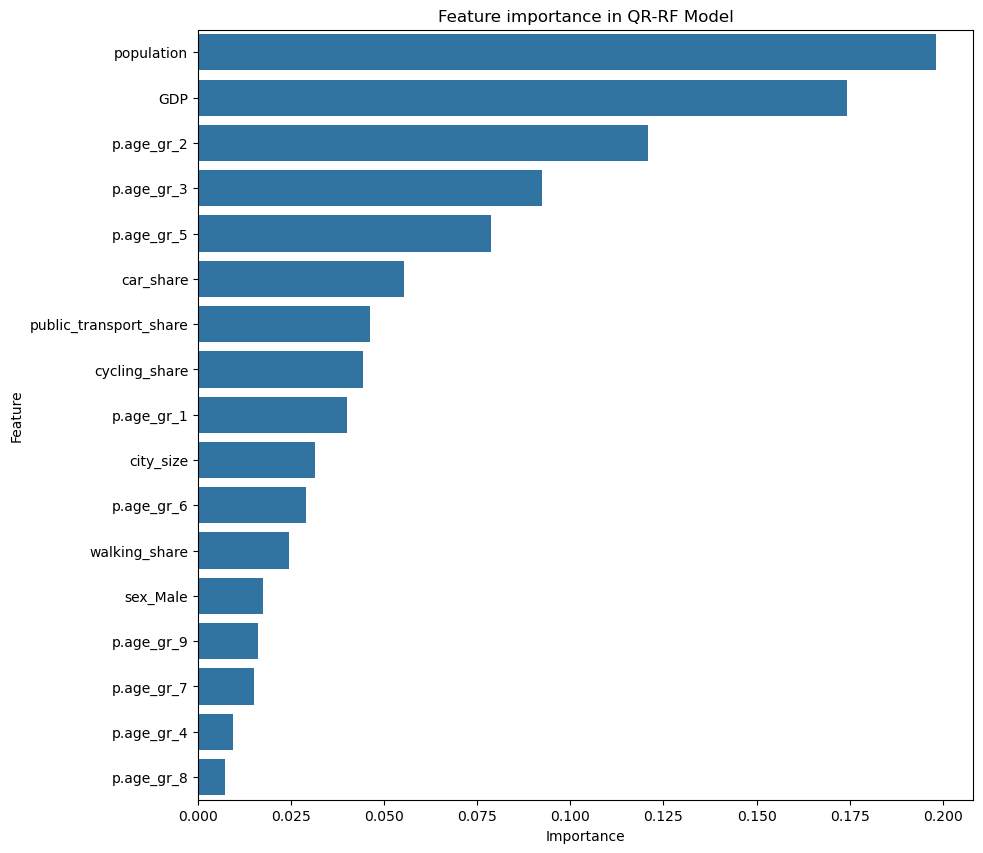

In [317]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': qrf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature importance in QR-RF Model')

plt.savefig("training/feature-importance-qrRF.png", dpi=300, bbox_inches="tight")

plt.show()

In [318]:
import numpy as np
from scipy import stats

# For predictions with quantile regression

def generate_travel_time_predictions_from_qrf(
    qrf_model,
    X_test: np.ndarray,
    n_samples: int = 1000,
    bound_quantiles: tuple = (0.05, 0.95),
    random_seed: int = None,
    precision: int = 1
) -> np.ndarray:
    """
    Generate individual travel time predictions from QRF output with controlled variability.
    
    Parameters:
        qrf_model: Fitted QuantileRegressionForest model with .predict() method
        X_test (np.ndarray): Input features for prediction
        n_samples (int): Number of individual predictions to generate per input row
        bound_quantiles (tuple): Quantiles used for bounds (default 5th and 95th)
        random_seed (int): Optional random seed for reproducibility
        precision (int): Decimal places to round predictions
        
    Returns:
        np.ndarray: Array of shape (len(X_test), n_samples) with individual predictions
        
    Example:
        >>> qrf = RandomForestQuantileRegressor().fit(X_train, y_train)
        >>> preds = generate_travel_time_predictions_from_qrf(qrf, X_test)
        >>> print(preds.shape)  # (n_test_samples, n_samples)
    """
    # Validate inputs
    assert len(bound_quantiles) == 2, "bound_quantiles must contain 2 values"
    assert 0 < bound_quantiles[0] < bound_quantiles[1] < 1, "Quantiles must be 0 < q1 < q2 < 1"
    
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Get QRF predictions for bounds and median
    lower_q, median, upper_q = qrf_model.predict(X_test, quantiles=[bound_quantiles[0], 0.5, bound_quantiles[1]]).T
    
    # Initialize output array
    all_predictions = np.zeros((len(X_test), n_samples))
    
    for i in range(len(X_test)):
        # Calculate log-normal parameters for this test case
        z_score = stats.norm.ppf(bound_quantiles[1])
        sigma = (np.log(upper_q[i]) - np.log(lower_q[i])) / (2 * z_score)
        mu = np.log(median[i])
        
        # Generate predictions
        preds = np.random.lognormal(mean=mu, sigma=sigma, size=n_samples)
        mask = preds > 360
        while np.any(mask):
            new_samples = np.random.lognormal(mean=mu, sigma=sigma, size=mask.sum())
            preds[mask] = new_samples
            mask = preds > 360
        
        # Force exact median and round
        # preds *= median[i] / np.median(preds)
        all_predictions[i] = np.round(preds, precision)
    
    return all_predictions

if __name__ == "__main__":
    # testing n first samples
    X_test_sample = X_test[:3]  # First 3 test samples

    # testing the full test dataset
    y_pred_qrf = generate_travel_time_predictions_from_qrf(
        qrf_model=qrf,
        X_test=X_test,
        n_samples=1,  # Small sample for demo
        random_seed=42
    )
    
    # print("Generated predictions shape:", preds.shape)
    # print("\nSample output for first test case:")
    # print(f"QRF raw quantiles (5th, 50th, 95th): {qrf.predict(X_test_sample[:1], quantiles=[0.05, 0.5, 0.95])[0]}")
    # print(f"Generated individual predictions: {preds[0]}")

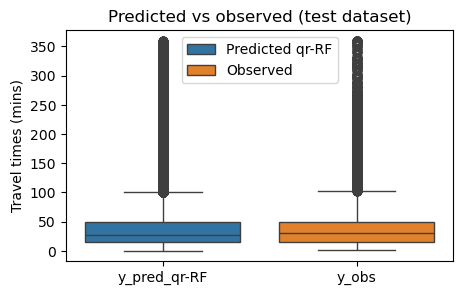

In [319]:
data = {
    #'y_pred': y_pred,  # Predicted values
    'y_pred_qr-RF': y_pred_qrf.reshape(-1),
    #'y_pred_qrf': y_pred_qrf[:,1],
    'y_obs': y_test  # Observed values
}

data = pd.DataFrame(data)

plt.figure(figsize=(10/2, 6/2))
sns.boxplot(data=data)
plt.title('Predicted vs observed (test dataset)')
plt.ylabel('Travel times (mins)')
plt.legend(['Predicted qr-RF', 'Observed'], loc='upper center')
plt.savefig("training/boxplot-travelTimes-qrRF.png", dpi=300, bbox_inches="tight")

# plt.xlabel('')
plt.show()

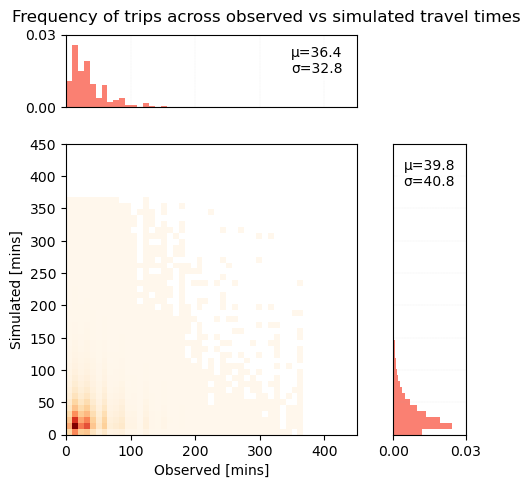

In [320]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data.y_obs and data.y_pred are your datasets
# If not defined, replace with your actual data
# Example: data.y_obs = np.random.rand(1000) * 500, data.y_pred = np.random.rand(1000) * 500

size=5
resolution = 50
upTo= 450

# Define custom bins
x_bins = np.linspace(0, upTo, resolution)  # Custom x bin edges
y_bins = np.linspace(0, upTo, resolution)  # Custom y bin edges

# Create figure and gridspec for layout
fig = plt.figure(figsize=(size, size))
gs = fig.add_gridspec(2, 2, 
                      width_ratios=(4, 1), 
                      height_ratios=(1, 4),
                      left=0.1, 
                      right=0.9, 
                      bottom=0.1, 
                      top=0.9,
                      wspace=0.05*4, 
                      hspace=0.05*4)

# Main 2D histogram
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)  # Marginal x
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)  # Marginal y

# Plot 2D histogram
h = ax.hist2d(data.y_obs, data["y_pred_qr-RF"], bins=[x_bins, y_bins], cmap='OrRd', cmin=1)

# Add a colorbar
# fig.colorbar(h[3], ax=ax, label='Density')

# Plot marginal histograms
ax_histx.hist(data.y_obs, bins=x_bins, density=True, color='salmon')
ax_histy.hist(data["y_pred_qr-RF"], bins=y_bins, density=True, orientation='horizontal', color='salmon')
ax_histx.grid(True, linestyle='--', alpha=0.7, lw=0.1)  # Grid for x-marginal histogram
ax_histy.grid(True, linestyle='--', alpha=0.7, lw=0.1)  # Grid for y-marginal histogram

# Set y-ticks to 2-digit precision in marginal plots
from matplotlib.ticker import FormatStrFormatter  # For tick formatting
ax_histx.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Top marginal (density)
ax_histy.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Right marginal (density)

# Calculate mean and variance for the marginal distributions
mean_obs = np.mean(data["y_obs"])
var_obs = np.std(data["y_obs"])
mean_sim = np.mean(data["y_pred_qr-RF"])
var_sim = np.std(data["y_pred_qr-RF"])

# Add text annotations for mean and variance in marginal plots
ax_histx.text(0.95, 0.85, 
              f"μ={mean_obs:.1f}\nσ={var_obs:.1f}", 
              transform=ax_histx.transAxes, 
              ha='right', va='top', 
              bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

ax_histy.text(0.85, 0.95, 
              f"μ={mean_sim:.1f}\nσ={var_sim:.1f}", 
              transform=ax_histy.transAxes, 
              ha='right', va='top', 
              bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Set y-axis limits for marginal plots (0 to 0.03)
ax_histx.set_ylim(0, 0.03)
ax_histy.set_xlim(0, 0.03)  # Since it's a horizontal histogram, x-axis is density

ax_histx.set_yticks([0, 0.03])
ax_histy.set_xticks([0, 0.03])

# Customize labels
ax.set_xlabel('Observed [mins]')
ax.set_ylabel('Simulated [mins]')
#ax_histx.set_ylabel('Density')
#ax_histy.set_xlabel('Density')

# Remove ticks from marginal plots for cleaner look
ax_histx.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax_histy.tick_params(axis='y', which='both', left=False, labelleft=False)

# Keep title empty as in your code
# ax.set_title('Frequency of trips across observed vs simulated travel times')
fig.suptitle("Frequency of trips across observed vs simulated travel times", fontsize=12, y=0.95)

plt.savefig("training/histObsSim-travelTimes-qrRF.png", dpi=300, bbox_inches="tight")
plt.show()

In [85]:
# scale=0.5
# plt.figure(figsize=(8*scale, 6*scale))
# plt.scatter(y_test, y_pred_qrf.reshape(-1), color='blue', alpha=0.01)

# # Add labels and title
# plt.xlabel("True Values (y_test)", fontsize=12)
# plt.ylabel("Predicted Values (y_pred)", fontsize=12)
# plt.title("Scatter plot: true vs predicted trip duration", fontsize=14)

# # Step 3: Add a reference line (45-degree line) where y_test == y_pred
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# plt.xlim([0, 500])
# plt.ylim([0, 500])

# # Step 4: Show the plot
# plt.tight_layout()
# plt.show()

In [330]:
# Reconstruct the test dataset by combining X_test and y_test
df_test = X_test.copy()
df_test['trip_duration'] = y_test  # Add the target variable (trip duration) to the test set

# Assuming you have predicted values, let's add a column for predicted trip duration
# You should have already made predictions on the test set
df_test['predicted_trip_duration'] = y_pred_qrf  # 'model' is your trained model

In [331]:
import pandas as pd
import numpy as np

def process_age_groups(ndf):
    """
    Processes age group columns in a DataFrame by:
    1. Setting p.age_gr_1 to 1 where all other age columns (p.age_gr_2 to p.age_gr_9) are 0
    2. Creating a consolidated p.age_gr column that contains the age group number
       (defaults to 1 if no age group is selected)
    
    Parameters:
    ndf (pd.DataFrame): Input DataFrame containing age group columns (p.age_gr_1 to p.age_gr_9)
    
    Returns:
    pd.DataFrame: Processed DataFrame with updated age group columns
    """
    # Create a copy of the input DataFrame
    processed_df = ndf.copy()
    
    # Columns p.age_gr_2 to p.age_gr_9
    # age_cols_2_to_9 = [f'p.age_gr_{i}' for i in range(2, 10)]
    
    # Set p.age_gr_1 = 1 where all other age columns are 0, else 0
    # processed_df["p.age_gr_1"] = (processed_df[age_cols_2_to_9] == 0).all(axis=1).astype(int)
    
    # Reorder columns to put p.age_gr_1 first
    # cols = ['p.age_gr_1'] + [col for col in processed_df.columns if col != 'p.age_gr_1']
    # processed_df = processed_df[cols]
    
    # Get all age group columns (p.age_gr_1 to p.age_gr_9)
    all_age_cols = [f'p.age_gr_{i}' for i in range(1, 10)]
    
    # Validate that only one age group is selected per row (or none)
    if not (processed_df[all_age_cols].sum(axis=1).isin([0, 1])).all():
        raise ValueError("Some rows have multiple age groups selected!")
    
    # Create the consolidated age group column
    processed_df['p.age_gr'] = (
        processed_df[all_age_cols].idxmax(axis=1)
        .str.extract(r'(\d+)')
        .astype(int)
    )
    
    # Default to 1 (p.age_gr_1) where no age group is selected
    processed_df['p.age_gr'] = np.where(
        processed_df[all_age_cols].sum(axis=1) == 0,
        1,
        processed_df['p.age_gr']
    )
    
    return processed_df

In [332]:
df_test= process_age_groups(df_test)

In [333]:
df_test.head()

,GDP,population,city_size,public_transport_share,cycling_share,car_share,walking_share,p.age_gr_1,p.age_gr_2,p.age_gr_3,p.age_gr_4,p.age_gr_5,p.age_gr_6,p.age_gr_7,p.age_gr_8,p.age_gr_9,sex_Male,trip_duration,predicted_trip_duration,p.age_gr
1258875,1980,710,641,0.385481,0.041829,0.319477,0.252512,False,False,False,False,False,True,False,False,False,True,15.0,50.2,6
811795,185,98,401,0.533511,0.006189,0.301826,0.156619,False,False,False,False,True,False,False,False,False,False,45.0,31.7,5
1417049,1980,710,641,0.385481,0.041829,0.319477,0.252512,False,False,False,False,True,False,False,False,False,False,75.0,61.9,5
424066,1890,810,1587,0.299224,0.090432,0.192128,0.354865,False,False,False,False,False,False,True,False,False,True,120.0,159.8,7
232551,650,270,331,0.193802,0.058766,0.346464,0.372513,False,False,False,False,False,True,False,False,False,False,10.0,25.4,6


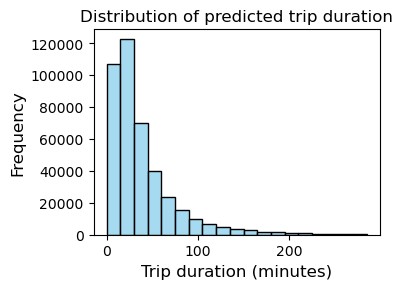

In [88]:
n=2
bins= np.arange(10*2)*30/2

# Create a figure
plt.figure(figsize=(4, 3))

# Plot a histogram with KDE overlay
sns.histplot(df_test['predicted_trip_duration'], kde=False, color='skyblue', bins=bins)

# Add labels and title
# plt.xlim([0, 100])
plt.xlabel("Trip duration (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of predicted trip duration", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

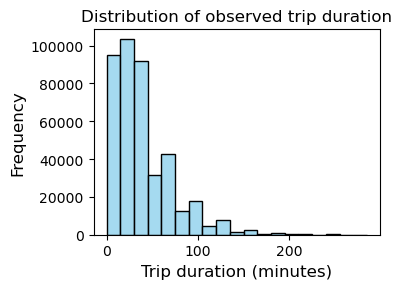

In [89]:
# Create a figure
plt.figure(figsize=(4, 3))

# Plot a histogram with KDE overlay
sns.histplot(df_test['trip_duration'], kde=False, color='skyblue', bins=bins)

# Add labels and title
# plt.xlim([0, 100])
plt.xlabel("Trip duration (minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of observed trip duration", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

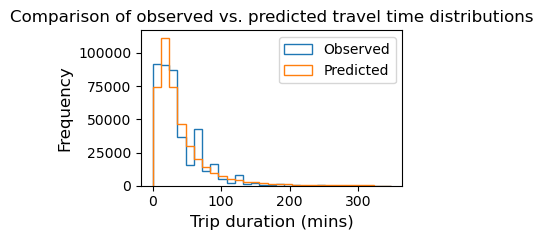

In [334]:
scale= 1.25
plt.figure(figsize=(3 *scale, 2 *scale))

div=12
bins= np.arange(360/div)*div
plt.hist(
    df_test['trip_duration'], 
    bins=bins,  
    alpha=1., 
    label='Observed',  histtype='step'
)
plt.hist(
    df_test['predicted_trip_duration'], 
    bins=bins,
    alpha=1., 
    label='Predicted',
    histtype='step'
)

plt.xlabel("Trip duration (mins)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Comparison of observed vs. predicted travel time distributions", fontsize=12)
plt.legend()

plt.savefig("training/histObsSim-travelTimes2.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

In [105]:
# ndf = df_test.copy()

# # Step 1: Reduce the dataset
# # Identify age group columns
# age_group_columns = [col for col in ndf.columns if col.startswith('p.age_group_')]

# # Create a single age_group column
# ndf['age_group'] = ndf[age_group_columns].idxmax(axis=1).str.replace('p.age_group_', '')

# # Handle cases where no age group is True
# ndf.loc[~ndf[age_group_columns].any(axis=1), 'age_group'] = '0-4'

# # Drop original age group columns
# ndf_reduced = ndf.drop(columns=age_group_columns)

# # Step 2: Compute mean trip_duration and predicted_trip_duration by age_group and sex_Male
# mean_data = ndf_reduced.groupby(['age_group', 'sex_Male'])[['trip_duration', 'predicted_trip_duration']].mean().reset_index()

# # # Step 3: Reshape data to long format for plotting
# # mean_data_melted = pd.melt(mean_data, 
# #                            id_vars=['age_group', 'sex_Male'], 
# #                            value_vars=['trip_duration', 'predicted_trip_duration'], 
# #                            var_name='Duration_Type', 
# #                            value_name='Mean_Duration')

# # # Define age group order
# # age_order = [
# #     '0-9', 
# #     '10-19', 
# #     '20-29', 
# #     '30-39', 
# #     '40-49', 
# #     '50-59', 
# #     '60-69', 
# #     '70-79', 
# #     '70+'
# # ] # '100-104', '105-109', '110-114', '115-119', 'Unknown'

# # mean_data_melted['age_group'] = pd.Categorical(mean_data_melted['age_group'], categories=age_order, ordered=True)

# # # create a grouped bar plot
# # scale=1.1
# # plt.figure(figsize=(6*scale, 3*scale))
# # palette = sns.color_palette("tab10", n_colors=len(mean_data_melted['Duration_Type'].unique()))

# # sns.barplot(data=mean_data_melted, 
# #             x='age_group', 
# #             y='Mean_Duration', 
# #             hue='Duration_Type', 
# #             palette=palette, 
# #             edgecolor=None)

# # # add labels and title
# # plt.xlabel('Age group', fontsize=12)
# # plt.ylabel('Mean duration (minutes)', fontsize=12)
# # plt.title('Comparison of mean trip duration and predicted trip duration by age group', fontsize=12)

# # # Rotate x-axis labels
# # plt.xticks(rotation=45, ha='right')

# # # Customize legend
# # # plt.legend(title='Duration Type', labels=['Actual Trip Duration', 'Predicted Trip Duration'])

# # # Adjust layout
# # plt.tight_layout()

# # # Show the plot
# # plt.show()

In [206]:
# step2: Attach travel times to trips

In [106]:
def duplicate_rows_by_total(df):
    """
    More efficient version using pandas index repetition
    """
    # Filter out zero totals
    df = df[df['Total'] > 0].copy()
    
    # Repeat each row according to Total column
    result_df = df.loc[df.index.repeat(df['Total'])]
    
    # Reset index
    result_df.reset_index(drop=True, inplace=True)
    
    return result_df.drop("Total", axis=1)

def plot_mean_trip_duration_by_age_gender(df, duration_col='trip_duration', 
                                        age_group_prefix='p.age_gr_', 
                                        gender_col='sex_Male',
                                        figsize=(6, 3), 
                                        bar_width=0.35,
                                        color_male='#1f77b4', 
                                        color_female='#ff7f0e',
                                        include_age_group_1=True):
    """
    Plots mean trip duration by age groups and gender, including age group 1.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing the trip data
    duration_col : str (default='trip_duration')
        Column name for trip duration
    age_group_prefix : str (default='p.age_gr_')
        Prefix for age group columns (expects columns like 'p.age_gr_1', 'p.age_gr_2', etc.)
    gender_col : str (default='sex_Male')
        Column name for gender (1=Male, 0=Female)
    figsize : tuple (default=(12, 6))
        Figure size
    bar_width : float (default=0.35)
        Width of bars in the plot
    color_male : str (default='#1f77b4')
        Color for male bars
    color_female : str (default='#ff7f0e')
        Color for female bars
    include_age_group_1 : bool (default=True)
        Whether to include age group 1 in the analysis
    
    Returns:
    --------
    matplotlib.figure.Figure
        The figure object
    """
    
    # Get all age group columns
    age_cols = [col for col in df.columns if col.startswith(age_group_prefix)]
    
    if not age_cols:
        raise ValueError(f"No age group columns found with prefix '{age_group_prefix}'")
    
    # Sort age groups numerically (1-9)
    age_cols = sorted(age_cols, key=lambda x: int(x.replace(age_group_prefix, "")))
    
    # Optionally exclude age group 1
    if not include_age_group_1:
        age_cols = [col for col in age_cols if col != f"{age_group_prefix}1"]
    
    # Calculate mean durations
    results = []
    for age_col in age_cols:
        # Handle age group 1 (where all other age groups are 0)
        if age_col == f"{age_group_prefix}1":
            mask = (df[age_col] == 1)
        else:
            mask = (df[age_col] == 1)
        
        for gender_val, gender_label in [(0, 'Female'), (1, 'Male')]:
            gender_mask = mask & (df[gender_col] == gender_val)
            mean_duration = df.loc[gender_mask, duration_col].mean() # change mean here
            results.append({
                'age_group': age_col.replace(age_group_prefix, ''),
                'gender': gender_label,
                'mean_duration': mean_duration,
                'count': gender_mask.sum()
            })
    
    results_df = pd.DataFrame(results)
    
    # Pivot for plotting
    pivot_df = results_df.pivot(index='age_group', columns='gender', values='mean_duration')
    counts_df = results_df.pivot(index='age_group', columns='gender', values='count')
    
    # Create plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Set position of bars on X axis
    x = np.arange(len(pivot_df.index))
    x_male = x + bar_width/2
    x_female = x - bar_width/2
    
    # Plot bars
    male_bars = ax.bar(x_male, pivot_df['Male'], width=bar_width, 
                      label='Male', color=color_male)
    female_bars = ax.bar(x_female, pivot_df['Female'], width=bar_width,
                        label='Female', color=color_female)
    
    # Add counts as text above bars
    for i, (male_count, female_count) in enumerate(zip(counts_df['Male'], counts_df['Female'])):
        if not np.isnan(pivot_df['Male'].iloc[i]):
            ax.text(x_male[i], pivot_df['Male'].iloc[i] * 1.02, f'n={male_count:,}', 
                   ha='center', va='bottom', fontsize=8)
        if not np.isnan(pivot_df['Female'].iloc[i]):
            ax.text(x_female[i], pivot_df['Female'].iloc[i] * 1.02, f'n={female_count:,}', 
                   ha='center', va='bottom', fontsize=8)
    
    # Customize plot
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Mean Trip Duration')
    ax.set_title('Mean Trip Duration by Age Group and Gender')
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_df.index)
    ax.legend()
    
    # Rotate x-axis labels if many age groups
    if len(age_cols) > 5:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    return fig

In [337]:
# Load SP data
sp= pd.read_csv("datasets/bogotaSP1.csv")

sp["sex_Male"] = (sp["p.female"]==0)

columns_to_keep = [col for col in sp.columns if col.startswith('p.age_gr_')] + ['sex_Male', 'Total']

sp = sp[columns_to_keep]

sp = sp.reset_index(drop=True)

# sp = sp.drop(["p.age_gr_1"], axis=1)

sp["p.id"]= sp.index



# Socio-demographic attributes
X_bogota = duplicate_rows_by_total(sp) 
# Need to address people without trips

#df[["car_share","cycling_share","walking_share","other_share","public_transport_share"]][df.city_name=="bogota_wb"]

# City-level attributes of Bogota
X_bogota["GDP"] = 1890
X_bogota["population"] = 810 
X_bogota["city_size"] = 1587 

# Mode shares
X_bogota["public_transport_share"] = 0.299224 
X_bogota["cycling_share"] = 0.090432
X_bogota["car_share"] = 0.192128
X_bogota["walking_share"] = 0.354865 

X_bogotaP = X_bogota.drop("p.id", axis=1).copy()
X_bogotaP[X_train.columns]
#X_bogota["trip_duration"]= xgb_model.predict(X_bogotaP[X_train.columns])

X_bogota["trip_duration"]=generate_travel_time_predictions_from_qrf(
        qrf_model=qrf,
        X_test=X_bogotaP[X_train.columns],
        n_samples=1,  # Small sample for demo
        random_seed=42
    )

# fig = plot_mean_trip_duration_by_age_gender(X_bogota)
# plt.show()

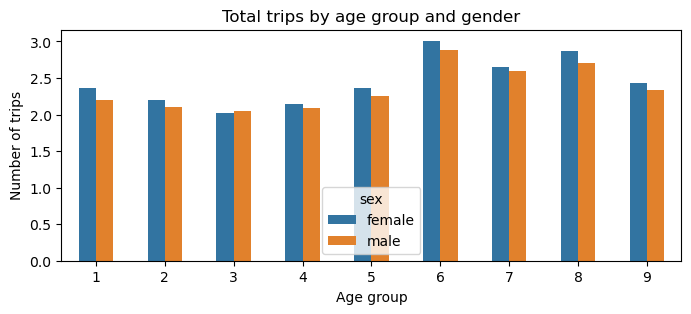

In [431]:
sp= process_age_groups(sp)
sp_processed = sp[["p.id","sex_Male","p.age_gr","Total"]].copy()
sp_processed['Total']= sp_processed['Total']/7*1.42
sp_processed['sex'] = sp_processed['sex_Male'].map({True: 'male', False: 'female'})
avg_trips = sp_processed.groupby(['p.age_gr', 'sex'])['Total'].mean().reset_index()

##
plt.figure(figsize=(8, 3))
sns.barplot(data=avg_trips, x='p.age_gr', y='Total', hue='sex', width=0.5)
plt.title("Total trips by age group and gender")
plt.xlabel("Age group")
plt.ylabel("Number of trips")
plt.show()

In [430]:
trSim=sp_processed["Total"].mean()
trObs=big["count"].mean()

trObs/trSim

np.float64(1.4245868396595482)

C:\Users\saadi\AppData\Local\Temp\ipykernel_9900\536920894.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_trips2 = bgt.groupby(['p.age_gr', 'sex'])['count'].mean().reset_index()


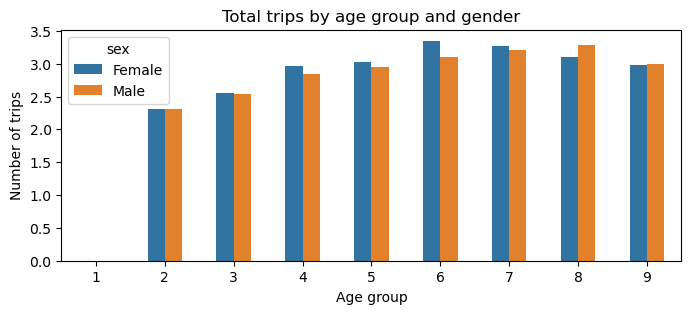

In [424]:
big=df[df.city_name_iso=="bogota"][["new_participant_id","p.age_gr", "sex", "trip_id", "trip_mode", "trip_duration"]].groupby("new_participant_id").size().reset_index(name='count')
bgt= pd.merge(df[df.city_name_iso=="bogota"][["new_participant_id","p.age_gr", "sex"]], big, on="new_participant_id")
#.groupby(["p.age_gr", "sex"]).size().reset_index(name='count')

avg_trips2 = bgt.groupby(['p.age_gr', 'sex'])['count'].mean().reset_index()

##
plt.figure(figsize=(8, 3))
sns.barplot(data=avg_trips2, x='p.age_gr', y='count', hue='sex', width=0.5)
plt.title("Total trips by age group and gender")
plt.xlabel("Age group")
plt.ylabel("Number of trips")
plt.show()

In [416]:
df.columns

Index(['participant_id', 'age', 'sex', 'trip_id', 'trip_mode', 'trip_duration',
       'city_name', 'trip_new_mode', 'car_share', 'cycling_share',
       'other_share', 'public_transport_share', 'walking_share', 'City_name',
       'population', 'GDP', 'city_size', 'country_x', 'city_name_iso',
       'new_participant_id', 'new_trip_id', 'country_y', 'country_iso',
       'core_city', 'uc_id', 'circuity', 'k_avg', 'length_mean',
       'length_median', 'length_total', 'street_segment_count', 'node_count',
       'orientation_entropy', 'prop_4way', 'prop_3way', 'prop_deadend',
       'self_loop_proportion', 'straightness', 'bc_gini', 'bc_max',
       'cc_avg_dir', 'cc_wt_avg_dir', 'pagerank_max', 'cc_avg_undir',
       'cc_wt_avg_undir', 'elev_iqr', 'elev_mean', 'elev_median', 'elev_range',
       'elev_std', 'grade_mean', 'grade_median', 'intersect_count',
       'intersect_count_clean', 'intersect_count_clean_topo', 'uc_names',
       'world_region', 'resident_pop', 'area_km2', 'built

In [346]:
# X_bogota.head()

# X_bogota["trip_duration"].values.reshape(-1)

# # Assuming your DataFrame is named 'df'
# age_cols = [f'p.age_gr_{i}' for i in range(2, 10)]  # Columns p.age_gr_2 to p.age_gr_9

# # Set p.age_gr_1 = 1 where all other age columns are 0, else 0
# X_bogotaVIZ= X_bogota.copy()
# X_bogotaVIZ["p.age_gr_1"] = (X_bogotaVIZ[age_cols] == 0).all(axis=1).astype(int)
# cols = ['p.age_gr_1'] + [col for col in X_bogotaVIZ.columns if col != 'p.age_gr_1']
# X_bogotaVIZ = X_bogotaVIZ[cols]


X_bogotaVIZ= X_bogota.copy()
# Get all age group columns (assuming they are named p.age_gr_1 to p.age_gr_9)
age_cols = [f'p.age_gr_{i}' for i in range(1, 10)]

# Ensure only one age group is selected per row (or none, defaulting to 1)
if not (X_bogotaVIZ[age_cols].sum(axis=1).isin([0, 1])).all():
    raise ValueError("Some rows have multiple age groups selected!")

# Create the new p.age_gr column:
# - If a row has a 1 in p.age_gr_i, then p.age_gr = i
# - If all are 0, default to 1 (as per your previous logic)
X_bogotaVIZ['p.age_gr'] = (
    X_bogotaVIZ[age_cols].idxmax(axis=1)
    .str.extract(r'(\d+)')  # <-- Now using raw string r'\d+' to avoid warning
    .astype(int)
)

# If some rows have all 0s, they will default to p.age_gr_1 (as before)
X_bogotaVIZ['p.age_gr'] = np.where(
    X_bogotaVIZ[age_cols].sum(axis=1) == 0,
    1,
    X_bogotaVIZ['p.age_gr']
)

In [351]:
X_bogotaVIZ.head()

,p.age_gr_1,p.age_gr_2,p.age_gr_3,p.age_gr_4,p.age_gr_5,p.age_gr_6,p.age_gr_7,p.age_gr_8,p.age_gr_9,sex_Male,p.id,GDP,population,city_size,public_transport_share,cycling_share,car_share,walking_share,trip_duration,p.age_gr
0,1,0,0,0,0,0,0,0,0,True,1,1890,810,1587,0.299224,0.090432,0.192128,0.354865,38.7,1
1,1,0,0,0,0,0,0,0,0,True,1,1890,810,1587,0.299224,0.090432,0.192128,0.354865,22.1,1
2,1,0,0,0,0,0,0,0,0,True,1,1890,810,1587,0.299224,0.090432,0.192128,0.354865,44.2,1
3,1,0,0,0,0,0,0,0,0,True,1,1890,810,1587,0.299224,0.090432,0.192128,0.354865,95.3,1
4,1,0,0,0,0,0,0,0,0,True,1,1890,810,1587,0.299224,0.090432,0.192128,0.354865,20.4,1


In [265]:
# TODO
df["sex_Male"]=(df.sex=="Male")

In [247]:
# df_filtered[df_filtered["city_name_iso"]=="bogota"]

In [248]:
# Check for NaN in the Bogota filtered data
bogota_filtered = df_filtered[(df_filtered["city_name_iso"] == "bogota")]
print("Number of NaN trip_duration values:", bogota_filtered["trip_duration"].isna().sum())

Number of NaN trip_duration values: 0


In [249]:
df_filtered[(df_filtered["city_name_iso"]=="bogota")]["p.age_gr"].value_counts()

p.age_gr
6    31954
5    23547
7    14792
8    10938
2     7454
9     7182
3     6919
4     3016
1        0
Name: count, dtype: int64

In [357]:
# Calculate average trip duration for X_bogotaVIZ
avg_bogota = X_bogotaVIZ.groupby('p.age_gr', observed=False)['trip_duration'].mean().reset_index()
avg_bogota['dataset'] = 'Predictive model'  # Add identifier column

# Calculate average trip duration for df_filtered
avg_filtered = df_filtered[(df_filtered["city_name_iso"]=="bogota")].groupby('p.age_gr', observed=False)['trip_duration'].mean().reset_index() # & (df_filtered["trip_duration"]>0)
avg_filtered['dataset'] = 'Travel survey Bogota'  # Add identifier column

# Combine both datasets
combined_avg = pd.concat([avg_bogota, avg_filtered])
combined_avg['trip_duration'] = combined_avg['trip_duration'].fillna(0)

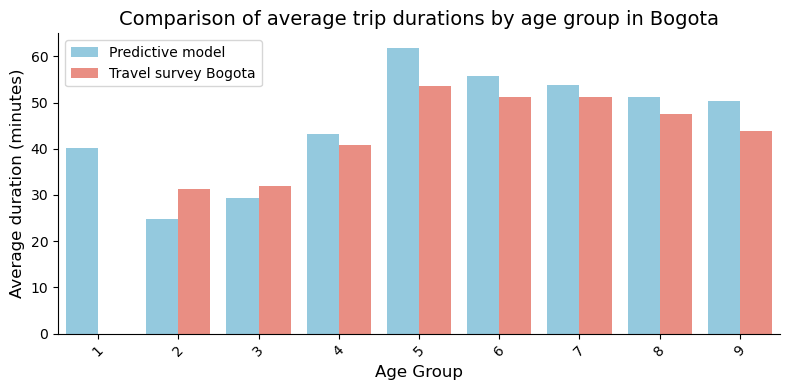

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt

scale=1.5
plt.figure(figsize=(12/scale, 6/scale))
sns.barplot(data=combined_avg, x='p.age_gr', y='trip_duration', 
            hue='dataset', palette=['skyblue', 'salmon'])
plt.title('Comparison of average trip durations by age group in Bogota', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='')
sns.despine()
plt.tight_layout()
plt.show()

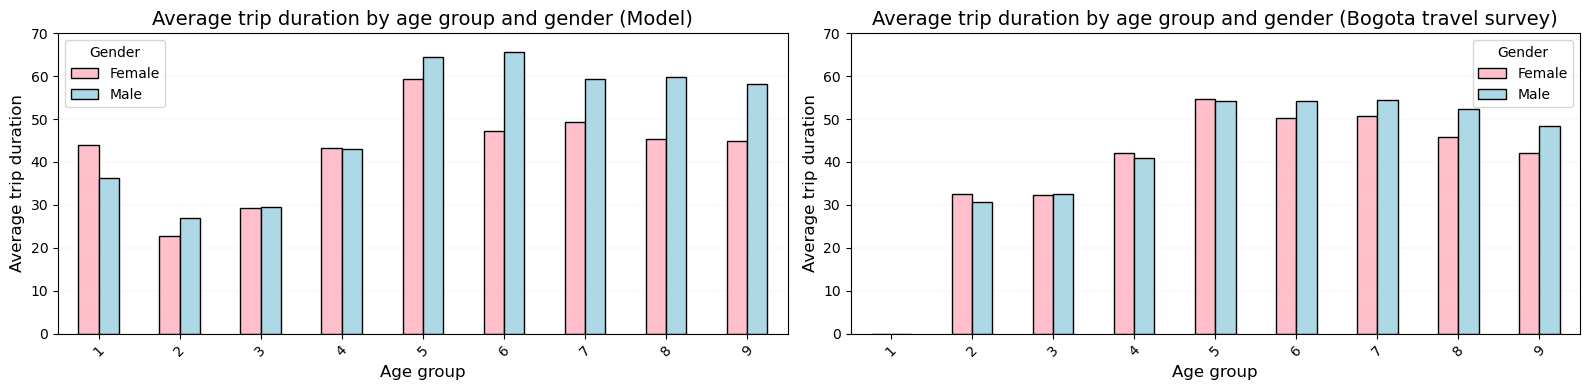

In [359]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_avg_trip_duration_by_age_gender(df, ax=None, title_suffix="", ly="trip_duration"):
    """
    Plots average trip duration by age group and gender.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'sex_Male', 'p.age_gr', and 'trip_duration' columns
    ax (matplotlib.axes.Axes, optional): Axes object to plot on. If None, creates a new figure.
    title_suffix (str, optional): Suffix to add to the plot title.
    """
    # Create a copy to avoid modifying the original dataframe
    data = df.copy()
    
    # Convert sex_Male to categorical Male/Female for better labeling
    data['gender'] = np.where(data['sex_Male'] == 1, 'Male', 'Female')
    
    # Group by age group and gender, calculate mean trip duration
    grouped = data.groupby(['p.age_gr', 'gender'], observed=False)[ly].mean().unstack()
    
    # If no axes provided, create a new figure
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plotting
    grouped.plot(kind='bar', color=['pink', 'lightblue'], edgecolor='black', ax=ax)
    
    # Customize the plot
    ax.set_title(f'Average trip duration by age group and gender {title_suffix}', fontsize=14)
    ax.set_xlabel('Age group', fontsize=12)
    ax.set_ylabel('Average trip duration', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='-', alpha=0.7, lw=0.1)
    ax.legend(title='Gender')

    ax.set_ylim([0, 70])
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Return the axes in case further modifications are needed
    return ax


# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Call the function twice with different data or filters
plot_avg_trip_duration_by_age_gender(X_bogotaVIZ, ax=ax1, title_suffix="(Model)")
plot_avg_trip_duration_by_age_gender(df[(df["city_name_iso"]=="bogota")], ax=ax2, title_suffix="(Bogota travel survey)")

# Adjust layout and display
plt.tight_layout()
plt.show()

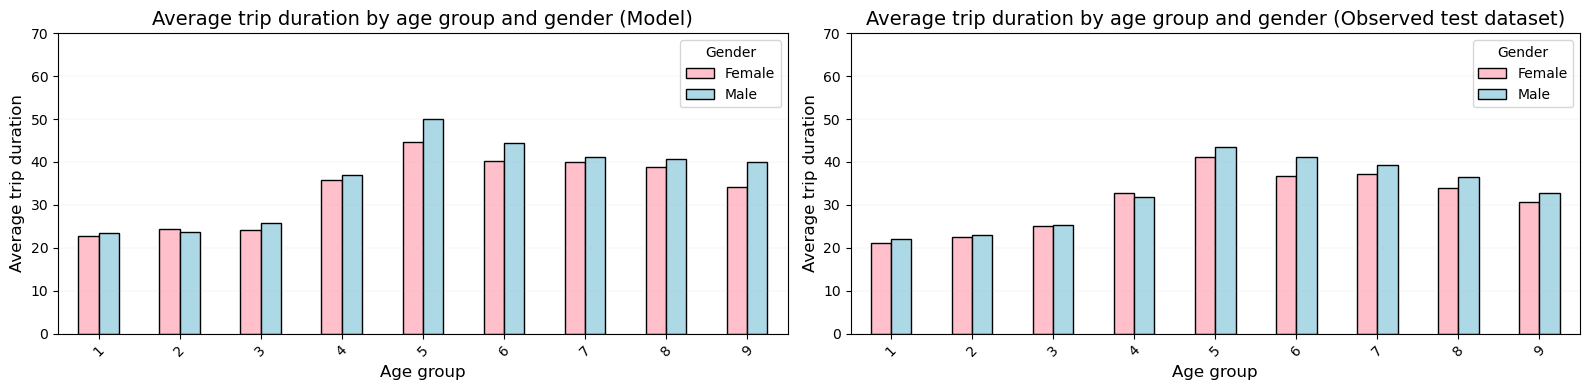

In [384]:
# test dataset looks good

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Call the function twice with different data or filters
plot_avg_trip_duration_by_age_gender(df_test, ax1, "(Model)", "predicted_trip_duration")
plot_avg_trip_duration_by_age_gender(df_test, ax2, "(Observed test dataset)", "trip_duration")

# Adjust layout and display
plt.tight_layout()

plt.savefig("training/travelTimes_validationSet_qrRF.png", dpi=300, bbox_inches="tight")
plt.show()

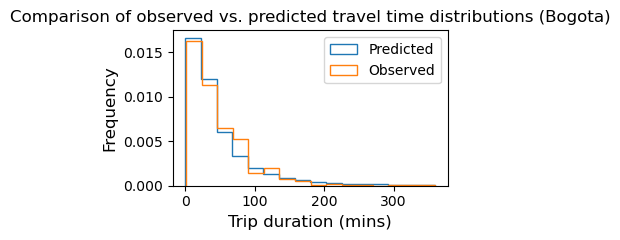

In [270]:
scale= 1.25
plt.figure(figsize=(3 *scale, 2 *scale))

# predicted
bins=2**4
plt.hist(X_bogota["trip_duration"], bins, histtype="step", density=True)
plt.hist(df_filtered[df_filtered.city_name_iso=="bogota"]["trip_duration"], bins, histtype="step", density=True)


plt.xlabel("Trip duration (mins)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Comparison of observed vs. predicted travel time distributions (Bogota)", fontsize=12)
plt.legend(['Predicted', 'Observed'])

plt.savefig("training/histObsSim-travelTimes2-bogota.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

In [542]:
# MODE CHOICE MODEL

df.head()

,participant_id,age,sex,trip_id,trip_mode,trip_duration,city_name,trip_new_mode,car_share,cycling_share,...,grade_mean,grade_median,intersect_count,intersect_count_clean,intersect_count_clean_topo,uc_names,world_region,resident_pop,area_km2,built_up_area_m2
0,1,36.0,Male,1.0,bus,60.0,accra-,pt,0.148904,0.021027,...,0.036655,0.023619,79777,71991,72178,Accra; Tema,Sub-Saharan Africa,5890466,1121,338400010
1,1,36.0,Male,2.0,bus,30.0,accra-,pt,0.148904,0.021027,...,0.036655,0.023619,79777,71991,72178,Accra; Tema,Sub-Saharan Africa,5890466,1121,338400010
2,1,36.0,Male,3.0,bus,30.0,accra-,pt,0.148904,0.021027,...,0.036655,0.023619,79777,71991,72178,Accra; Tema,Sub-Saharan Africa,5890466,1121,338400010
3,1,36.0,Male,4.0,bus,60.0,accra-,pt,0.148904,0.021027,...,0.036655,0.023619,79777,71991,72178,Accra; Tema,Sub-Saharan Africa,5890466,1121,338400010
4,1,36.0,Male,5.0,taxi,60.0,accra-,car,0.148904,0.021027,...,0.036655,0.023619,79777,71991,72178,Accra; Tema,Sub-Saharan Africa,5890466,1121,338400010


In [360]:
df.trip_new_mode.value_counts()

trip_new_mode
pt            605656
car           537078
walk          406797
motorcycle     63083
bike           33395
other          17167
Name: count, dtype: int64

In [361]:
df_filtered['trip_new_mode'].unique()

array(['pt', 'car', 'walk', 'motorcycle', 'bike', 'other'], dtype=object)

In [362]:
df_filtered.columns

Index(['participant_id', 'age', 'sex', 'trip_id', 'trip_mode', 'trip_duration',
       'city_name', 'trip_new_mode', 'car_share', 'cycling_share',
       'other_share', 'public_transport_share', 'walking_share', 'City_name',
       'population', 'GDP', 'city_size', 'country_x', 'city_name_iso',
       'new_participant_id', 'new_trip_id', 'country_y', 'country_iso',
       'core_city', 'uc_id', 'circuity', 'k_avg', 'length_mean',
       'length_median', 'length_total', 'street_segment_count', 'node_count',
       'orientation_entropy', 'prop_4way', 'prop_3way', 'prop_deadend',
       'self_loop_proportion', 'straightness', 'bc_gini', 'bc_max',
       'cc_avg_dir', 'cc_wt_avg_dir', 'pagerank_max', 'cc_avg_undir',
       'cc_wt_avg_undir', 'elev_iqr', 'elev_mean', 'elev_median', 'elev_range',
       'elev_std', 'grade_mean', 'grade_median', 'intersect_count',
       'intersect_count_clean', 'intersect_count_clean_topo', 'uc_names',
       'world_region', 'resident_pop', 'area_km2', 'built

In [363]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df_encoded = pd.get_dummies(
    df_filtered[[
        # Demographic and trip features
        'p.age_gr',
        'sex',
        'trip_duration',
        'trip_new_mode',
        
        # Macro indicators
        'GDP',
        'population',
        'city_size',
        
        # Transport mode shares
        'public_transport_share',
        'cycling_share',
        'car_share',
        'walking_share',
        
        # Network topology metrics
        'circuity',
        'k_avg',
        'length_mean',
        'length_median',
        'length_total',
        'street_segment_count',
        'node_count',
        
        # Intersection properties
        'orientation_entropy',
        'prop_4way',
        'prop_3way',
        'prop_deadend',
        'self_loop_proportion',
        'straightness',
        
        # Centrality measures
        'bc_gini',
        'bc_max',
        'cc_avg_dir',
        'cc_wt_avg_dir',
        'pagerank_max',
        'cc_avg_undir',
        'cc_wt_avg_undir',
        
        # Elevation metrics
        'elev_iqr',
        'elev_mean',
        'elev_median',
        'elev_range',
        'elev_std',
        'grade_mean',
        'grade_median',
        
        # Intersection counts
        'intersect_count',
        'intersect_count_clean',
        'intersect_count_clean_topo',
        
        # Additional city attributes
        'resident_pop',
        'area_km2',
        'built_up_area_m2'
    ]],
    columns=['p.age_gr', 'sex'],
    drop_first=False
)

# Encode target variable
le_mode = LabelEncoder()
df_encoded['trip_new_mode'] = le_mode.fit_transform(df_encoded['trip_new_mode'])
df_encoded = df_encoded.drop(["sex_Female"], axis=1)

In [364]:
df_encoded.columns

Index(['trip_duration', 'trip_new_mode', 'GDP', 'population', 'city_size',
       'public_transport_share', 'cycling_share', 'car_share', 'walking_share',
       'circuity', 'k_avg', 'length_mean', 'length_median', 'length_total',
       'street_segment_count', 'node_count', 'orientation_entropy',
       'prop_4way', 'prop_3way', 'prop_deadend', 'self_loop_proportion',
       'straightness', 'bc_gini', 'bc_max', 'cc_avg_dir', 'cc_wt_avg_dir',
       'pagerank_max', 'cc_avg_undir', 'cc_wt_avg_undir', 'elev_iqr',
       'elev_mean', 'elev_median', 'elev_range', 'elev_std', 'grade_mean',
       'grade_median', 'intersect_count', 'intersect_count_clean',
       'intersect_count_clean_topo', 'resident_pop', 'area_km2',
       'built_up_area_m2', 'p.age_gr_1', 'p.age_gr_2', 'p.age_gr_3',
       'p.age_gr_4', 'p.age_gr_5', 'p.age_gr_6', 'p.age_gr_7', 'p.age_gr_8',
       'p.age_gr_9', 'sex_Male'],
      dtype='object')

In [365]:
# Define features (X) and target (y)
X = df_encoded.drop(columns=['trip_new_mode'])
y = df_encoded['trip_new_mode']

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [549]:
# # Use class_weight='balanced' to handle class imbalance
# rf_cmodel = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=10,  # Limit depth to prevent overfitting
#     min_samples_split=10,
#     min_samples_leaf=5,
#     class_weight='balanced',  # Adjust for class imbalance
#     random_state=42,
#     verbose=1,
#     n_jobs=-1  # Use all available cores
# )

# # 5. Train the Model
# rf_cmodel.fit(X_train, y_train)

# # 6. Evaluate the Model
# # Predict on test set
# y_pred = rf_cmodel.predict(X_test)

In [366]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for imbalance handling
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
sample_weights = np.array([class_weights[cls] for cls in y_train])

xgb_model = XGBClassifier(
    # Core parameters
    objective='multi:softprob',
    num_class=6,                # Critical for 6-class classification
    eval_metric='mlogloss',     # Multi-class logloss
    
    # Tree structure (similar to your RF)
    n_estimators=200,           # Can increase since we'll use early stopping
    max_depth=10,               # Same as your RF
    min_child_weight=5,         # Analogous to min_samples_leaf=5
    gamma=0.1,                  # Slight regularization on splits
    
    # Randomization (like RF's feature sampling)
    subsample=0.8,              # Randomly sample 80% of instances
    colsample_bytree=0.8,       # Randomly sample 80% of features
    
    # Regularization
    reg_alpha=0.1,              # L1 regularization
    reg_lambda=1.0,             # L2 regularization
    
    # Learning
    learning_rate=0.05,         # Lower than default for better generalization
    early_stopping_rounds=20,   # Auto-stop if no improvement
    
    # System
    n_jobs=-1,
    random_state=42,
    verbosity=1
)

# Train with class weights and validation monitoring
xgb_model.fit(
    X_train, y_train,
    sample_weight=sample_weights,
    eval_set=[(X_test, y_test)],
    verbose=False
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1, num_class=6, ...)

In [367]:
# 1. Generate deterministic predictions (class labels)
X_pred_xgb = xgb_model.predict(X_test)

# 2. Generate probabilistic predictions (recommended for most cases)
X_pred_proba = xgb_model.predict_proba(X_test)

# 3. (Optional) Stochastic sampling from probabilities
np.random.seed(42)  # for reproducibility
stochastic_preds = np.array([
    np.random.choice(np.arange(X_pred_proba.shape[1]), p=probs)
    for probs in X_pred_proba
])

# Create comprehensive output DataFrame
results = pd.DataFrame({
    'deterministic_pred': X_pred_xgb,
    'stochastic_pred': stochastic_preds,
    **{f'prob_class_{i}': X_pred_proba[:, i] 
       for i in range(X_pred_proba.shape[1])}
})

Classification Report:


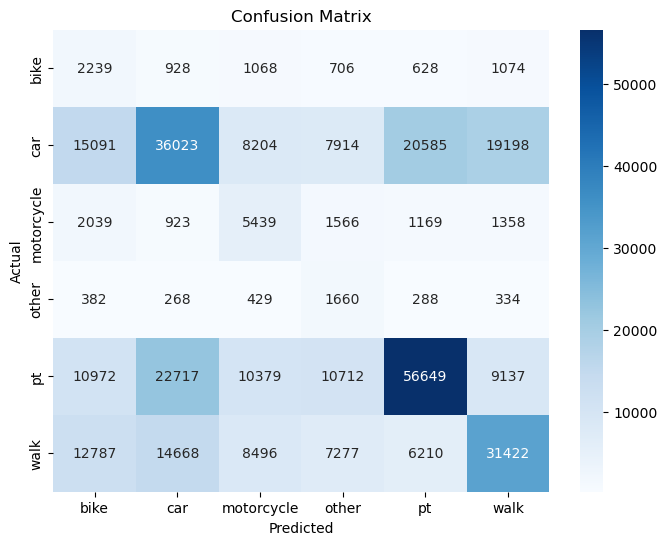


Feature Importance:
                       Feature  Importance
7                walking_share    0.172278
5                cycling_share    0.137759
6                    car_share    0.072619
30                 elev_median    0.061071
20                straightness    0.060758
38                resident_pop    0.032440
21                     bc_gini    0.032018
29                   elev_mean    0.031489
8                     circuity    0.030688
17                   prop_3way    0.021915
26                cc_avg_undir    0.017227
33                  grade_mean    0.016940
15         orientation_entropy    0.016314
16                   prop_4way    0.015304
50                    sex_Male    0.014462
0                trip_duration    0.014011
42                  p.age_gr_2    0.013268
34                grade_median    0.012842
39                    area_km2    0.012763
4       public_transport_share    0.012628
43                  p.age_gr_3    0.011524
14                  node_count   

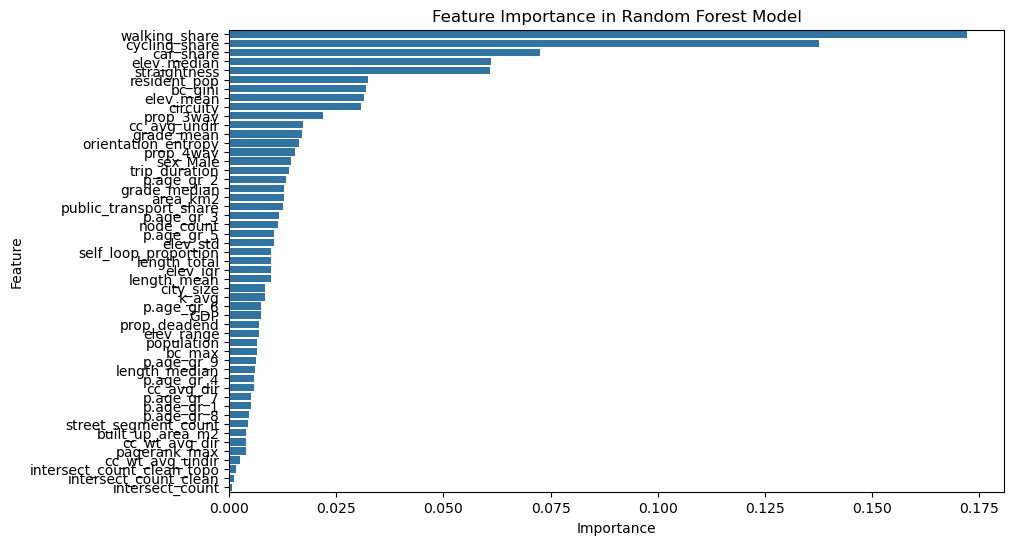

In [385]:
# Print classification report
print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=le_mode.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, stochastic_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_mode.classes_, yticklabels=le_mode.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("training/confusionMatrix.png", dpi=300, bbox_inches="tight")
plt.show()

# Cross-validation score
# cv_scores = cross_val_score(rf_cmodel, X, y, cv=5, scoring='f1_weighted')
# print(f"Cross-Validation F1-Weighted Scores: {cv_scores}")
# print(f"Mean CV F1-Weighted Score: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.savefig("training/modeChoiceFeatures.png", dpi=300, bbox_inches="tight")
plt.show()


Mode Shares (%):
             Observed  Predicted
bike         2.007319  10.837042
car         32.336775  21.343208
motorcycle   3.775318  10.607695
other        1.015595   9.182055
pt          36.431487  30.194991
walk        24.433506  17.835009


<Figure size 1000x600 with 0 Axes>

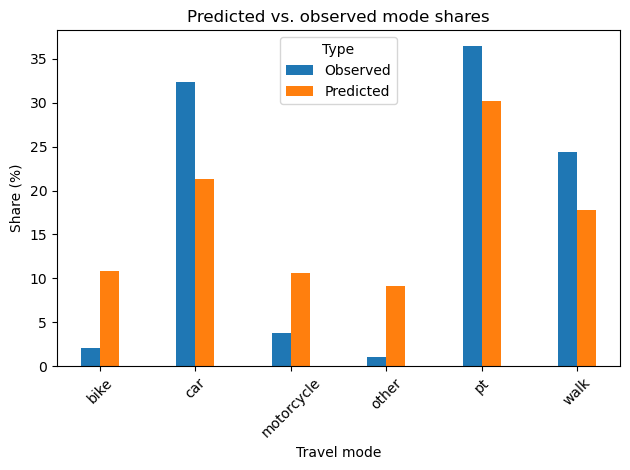


Absolute differences in mode shares (%):
            Absolute difference
bike                   8.829724
car                   10.993567
motorcycle             6.832377
other                  8.166460
pt                     6.236497
walk                   6.598497


In [369]:
# Calculate Mode Shares
# Observed mode shares (actual, from y_test)
observed_shares = pd.Series(y_test).value_counts(normalize=True).rename('Observed')
observed_shares.index = le_mode.inverse_transform(observed_shares.index)

# Predicted mode shares (from y_pred)
predicted_shares = pd.Series(X_pred_xgb).value_counts(normalize=True).rename('Predicted')
predicted_shares.index = le_mode.inverse_transform(predicted_shares.index)

# Combine into a DataFrame
mode_shares = pd.DataFrame({
    'Observed': observed_shares,
    'Predicted': predicted_shares
}).fillna(0)  # Fill missing modes with 0 if any

# Convert to percentages for readability
mode_shares *= 100

# Print mode shares
print("\nMode Shares (%):")
print(mode_shares)

# 7. Visualize Mode Shares (Updated)
plt.figure(figsize=(10, 6))
mode_shares.plot(kind='bar', width=0.4)
plt.title('Predicted vs. observed mode shares')
plt.xlabel('Travel mode')
plt.ylabel('Share (%)')
# Explicitly set x-axis labels to mode names
plt.xticks(ticks=range(len(mode_shares.index)), labels=mode_shares.index, rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# 8. Calculate Absolute Differences
mode_shares['Absolute difference'] = abs(mode_shares['Predicted'] - mode_shares['Observed'])
print("\nAbsolute differences in mode shares (%):")
print(mode_shares[['Absolute difference']])


# Kelly : cycling / motocycling ... 
# pt/car ownership estimates from other datastets
# motorcyling -> injuries 

In [370]:
X_test.columns

Index(['trip_duration', 'GDP', 'population', 'city_size',
       'public_transport_share', 'cycling_share', 'car_share', 'walking_share',
       'circuity', 'k_avg', 'length_mean', 'length_median', 'length_total',
       'street_segment_count', 'node_count', 'orientation_entropy',
       'prop_4way', 'prop_3way', 'prop_deadend', 'self_loop_proportion',
       'straightness', 'bc_gini', 'bc_max', 'cc_avg_dir', 'cc_wt_avg_dir',
       'pagerank_max', 'cc_avg_undir', 'cc_wt_avg_undir', 'elev_iqr',
       'elev_mean', 'elev_median', 'elev_range', 'elev_std', 'grade_mean',
       'grade_median', 'intersect_count', 'intersect_count_clean',
       'intersect_count_clean_topo', 'resident_pop', 'area_km2',
       'built_up_area_m2', 'p.age_gr_1', 'p.age_gr_2', 'p.age_gr_3',
       'p.age_gr_4', 'p.age_gr_5', 'p.age_gr_6', 'p.age_gr_7', 'p.age_gr_8',
       'p.age_gr_9', 'sex_Male'],
      dtype='object')

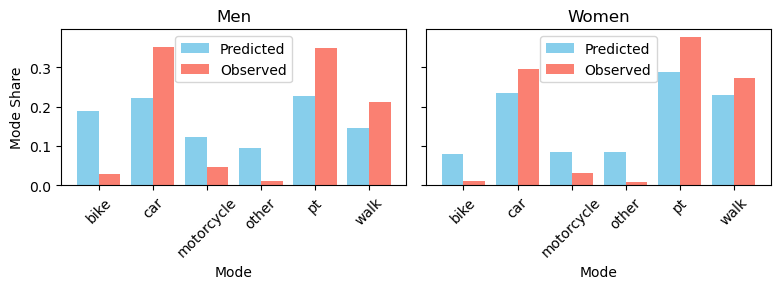

In [371]:
res1=X_test.copy()
res1["predicted_mode"]= stochastic_preds
res1["observed_mode"]= y_test
res1[["predicted_mode","observed_mode","sex_Male"]]

modes = np.arange(len(mode_shares.index))

# Compute mode shares by gender

shares = []

for sex in [True, False]:
    sex_label = 'Men' if sex else 'Women'
    df_sex = res1[res1['sex_Male'] == sex]
    total = len(df_sex)
    
    # Predicted and observed mode shares
    for mode in modes:
        pred_share = len(df_sex[df_sex['predicted_mode'] == mode]) / total if total > 0 else 0
        obs_share = len(df_sex[df_sex['observed_mode'] == mode]) / total if total > 0 else 0
        shares.append({'Sex': sex_label, 'Mode': mode, 'Predicted': pred_share, 'Observed': obs_share})

# Convert to DataFrame for plotting
shares_df = pd.DataFrame(shares)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(4*2, 3), sharey=True)

# Men plot
men_df = shares_df[shares_df['Sex'] == 'Men']
axes[0].bar(men_df['Mode'] - 0.2, men_df['Predicted'], width=0.4, label='Predicted', color='skyblue')
axes[0].bar(men_df['Mode'] + 0.2, men_df['Observed'], width=0.4, label='Observed', color='salmon')
axes[0].set_title('Men')
axes[0].set_xlabel('Mode')
axes[0].set_ylabel('Mode Share')
#axes[0].set_xticks(modes)
axes[0].set_xticks(ticks=range(len(mode_shares.index)), labels=mode_shares.index, rotation=45)
axes[0].legend()

# Women plot
women_df = shares_df[shares_df['Sex'] == 'Women']
axes[1].bar(women_df['Mode'] - 0.2, women_df['Predicted'], width=0.4, label='Predicted', color='skyblue')
axes[1].bar(women_df['Mode'] + 0.2, women_df['Observed'], width=0.4, label='Observed', color='salmon')
axes[1].set_title('Women')
axes[1].set_xlabel('Mode')
axes[1].set_xticks(ticks=range(len(mode_shares.index)), labels=mode_shares.index, rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

In [372]:
# Attach trip modes


cols_to_keep= list(set(X_train.columns)-set(X_bogota.columns))

X_bogotaP = X_bogota.drop("p.id", axis=1).copy()

for col in cols_to_keep:
    X_bogotaP[col] = indicators[cols_to_keep][indicators.core_city=="bogota"][col]

# X_bogotaP[X_train.columns]

In [373]:
nclasses=6

probas= xgb_model.predict_proba(X_bogotaP[X_train.columns])

# Number of classes
n_classes = probas.shape[1]  

# Sample a class for each row
X_bogotaP["trip_mode"] = np.array([np.random.choice(n_classes, p=row_probs) for row_probs in probas])


In [560]:
# Prediction for mode choice

# X_bogotaP["trip_mode"]= xgb_model.predict(X_bogotaP[X_train.columns])

In [374]:
FinalData= X_bogotaP.copy()
FinalData["p.id"]= X_bogota["p.id"]

In [375]:
FinalData['p.age_gr_1'] = ((FinalData[['p.age_gr_2', 'p.age_gr_3', 'p.age_gr_4', 'p.age_gr_5', 
                         'p.age_gr_6', 'p.age_gr_7', 'p.age_gr_8', 'p.age_gr_9']] == 0).all(axis=1)).astype(int)

In [376]:
# Correct age group mapping
age_group_mapping = {
    'p.age_gr_1': '0-4',
    'p.age_gr_2': '5-10',
    'p.age_gr_3': '11-15',
    'p.age_gr_4': '16-17',
    'p.age_gr_5': '18-29',
    'p.age_gr_6': '30-49',
    'p.age_gr_7': '50-59',
    'p.age_gr_8': '60-69',
    'p.age_gr_9': '70+'
}

# List of age group columns in order
age_cols = ['p.age_gr_1', 'p.age_gr_2', 'p.age_gr_3', 'p.age_gr_4', 
            'p.age_gr_5', 'p.age_gr_6', 'p.age_gr_7', 'p.age_gr_8', 'p.age_gr_9']

# Create the new dataframe
adjusted_df = pd.DataFrame()

# Map participant_id
adjusted_df['participant_id'] = FinalData['p.id']

# Determine age - finds which age group column has True/1 for each row
adjusted_df['age'] = FinalData[age_cols].idxmax(axis=1).map(age_group_mapping)

# Map sex (assuming 1=Male, 0=Female)
adjusted_df['sex'] = FinalData['sex_Male'].map({True: 'Male', False: 'Female'})

# Copy trip information
adjusted_df['trip_mode'] = FinalData['trip_mode']
adjusted_df['trip_duration'] = FinalData['trip_duration']

# Create unique trip_id for each participant's trips
# Sort by participant_id and trip_duration for consistent ordering
adjusted_df = adjusted_df.sort_values(['participant_id', 'trip_duration'])
adjusted_df['trip_id'] = adjusted_df.groupby('participant_id').cumcount() + 1

# Reorder columns as requested
adjusted_df = adjusted_df[['participant_id', 'age', 'sex', 'trip_id', 'trip_mode', 'trip_duration']]

adjusted_df["trip_mode"]= le_mode.inverse_transform(adjusted_df['trip_mode'])

# Reset index
adjusted_df.reset_index(drop=True, inplace=True)

In [377]:
adjusted_df.head() # assign modes as labels

,participant_id,age,sex,trip_id,trip_mode,trip_duration
0,1,0-4,Male,1,other,16.6
1,1,0-4,Male,2,walk,20.4
2,1,0-4,Male,3,motorcycle,20.4
3,1,0-4,Male,4,walk,22.1
4,1,0-4,Male,5,walk,38.7


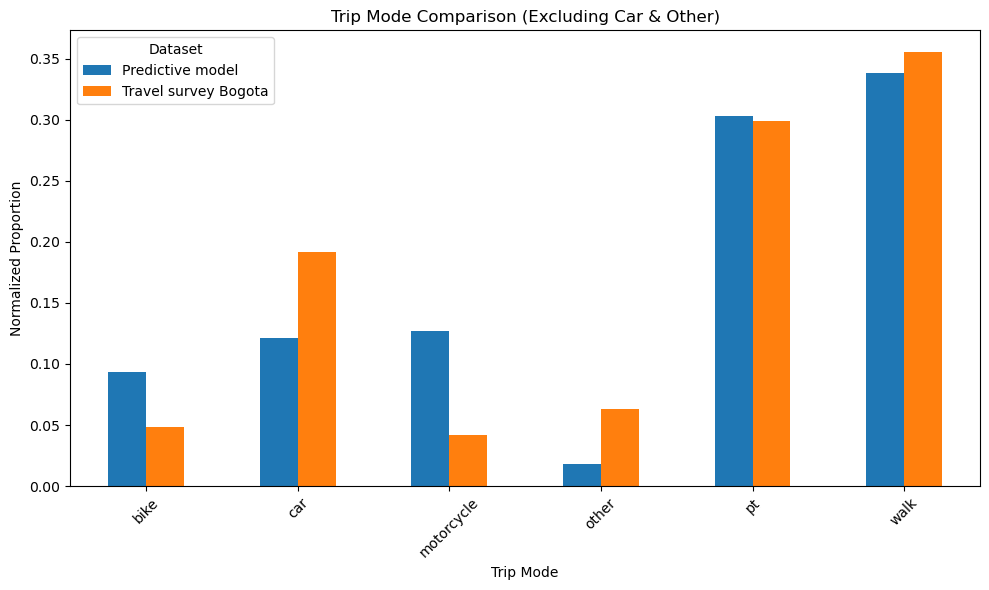

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Given data
filtered_new = adjusted_df.trip_mode.value_counts(normalize=False)

filtered_original =  df_filtered[df_filtered.city_name=="bogota_wb"]["trip_new_mode"].value_counts(normalize=False)


# 2. Renormalize to sum to 1.0
filtered_original_normalized = filtered_original / filtered_original.sum()
filtered_new_normalized = filtered_new / filtered_new.sum()

# 3. Combine into a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Predictive model': filtered_new_normalized,
    'Travel survey Bogota': filtered_original_normalized
}).fillna(0)  # Handle modes missing in one series

# 4. Plot
fig, ax = plt.subplots(figsize=(10, 6))
comparison_df.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_title('Trip Mode Comparison (Excluding Car & Other)')
ax.set_ylabel('Normalized Proportion')
ax.set_xlabel('Trip Mode')
ax.legend(title='Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("training/modeShares_Bogota.png", dpi=300, bbox_inches="tight")
plt.show()


# look at mode shares by age/gender - consider big bands
# force mode shares (in the short-term)


In [661]:
# Do not include people with 0 trips

adjusted_df.to_csv("datasets/bogota_synthetic_trips.csv", index=False)

In [649]:
adjusted_df[adjusted_df["trip_mode"]=="walk"].age.value_counts()

age
30-49    73213
18-29    37257
5-10     34210
50-59    32049
11-15    30755
60-69    27233
16-17    26811
70+      18928
0-4      18319
Name: count, dtype: int64

In [650]:
adjusted_df.age.value_counts()

age
30-49    327946
18-29    162302
50-59    115079
60-69     81255
16-17     57809
0-4       54481
5-10      50394
11-15     50263
70+       48992
Name: count, dtype: int64

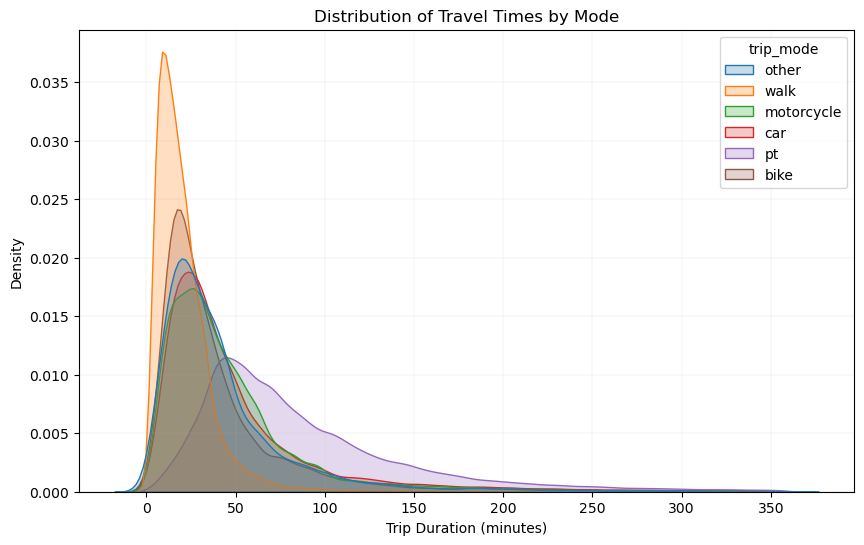

In [387]:
# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=adjusted_df, x='trip_duration', hue='trip_mode', fill=True, common_norm=False)

plt.title('Distribution of Travel Times by Mode')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density')
plt.grid(True, lw=0.1)
plt.savefig("training/distanceDistributionsByModeBogotaPredicted.png", dpi=300, bbox_inches="tight")
plt.show()

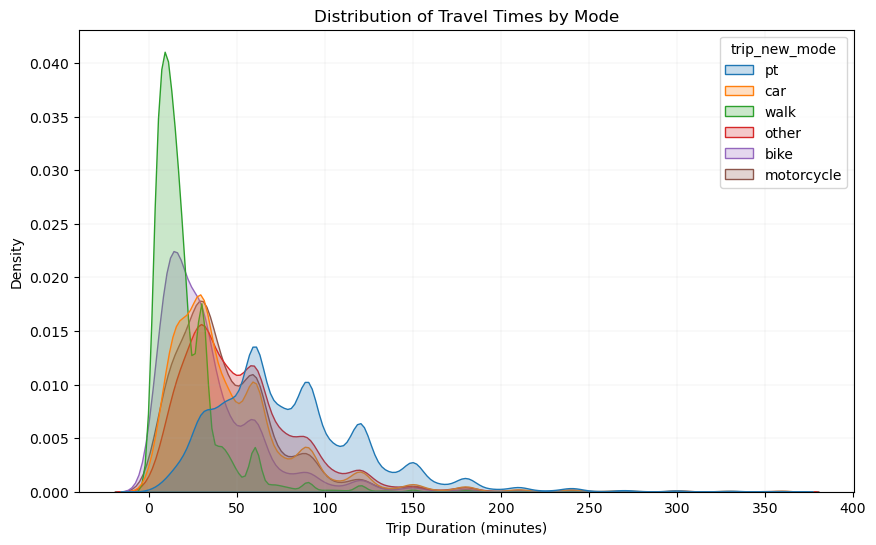

In [388]:
# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered[df_filtered.city_name=="bogota_wb"], x='trip_duration', hue='trip_new_mode', fill=True, common_norm=False)
plt.title('Distribution of Travel Times by Mode')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density')
plt.grid(True, lw=0.1)
plt.savefig("training/distanceDistributionsByModeBogotaObserved.png", dpi=300, bbox_inches="tight")
plt.show()

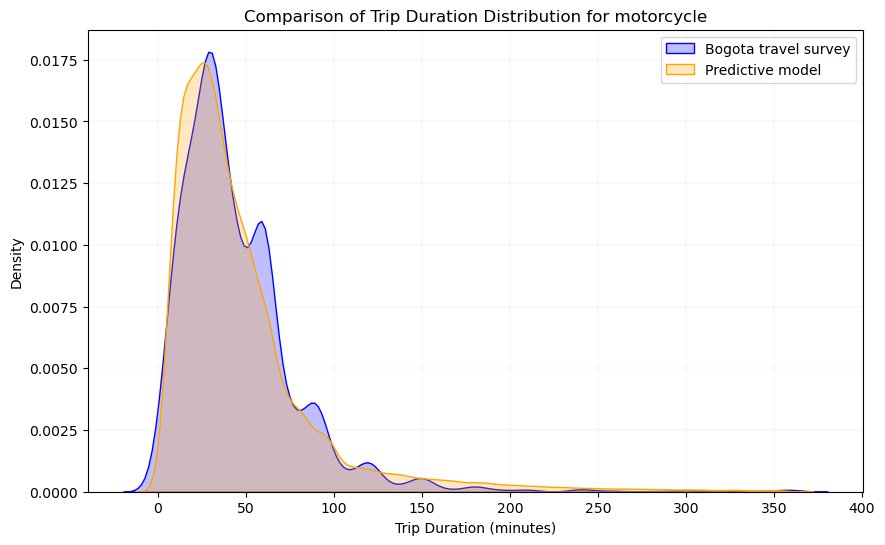

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the mode you want to compare (change this to your desired mode)
selected_mode = "motorcycle"  # Example - replace with your actual mode name

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the original data (filtered for bogota_wb and the selected mode)
sns.kdeplot(data=df_filtered[(df_filtered.city_name=="bogota_wb") & 
                            (df_filtered.trip_new_mode==selected_mode)], 
            x='trip_duration', 
            color='blue', 
            label=f'Original ({selected_mode})',
            fill=True)

# Plot the adjusted data (filtered for the selected mode)
sns.kdeplot(data=adjusted_df[adjusted_df.trip_mode==selected_mode], 
            x='trip_duration', 
            color='orange', 
            label=f'Adjusted ({selected_mode})',
            fill=True)

plt.title(f'Comparison of Trip Duration Distribution for {selected_mode}')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density')
plt.grid(True, lw=0.1)
plt.legend(["Bogota travel survey","Predictive model"])
plt.savefig("training/"+ selected_mode +"DistanceDistributions.png", dpi=300, bbox_inches="tight")
plt.show()

In [636]:
tests= pd.DataFrame(xgb_model.predict_proba(X_bogotaP[X_train.columns].head(10000)))
tests.columns= le_mode.inverse_transform(list(tests.columns) )
tests.median()

bike          0.163841
car           0.143076
motorcycle    0.128783
other         0.019607
pt            0.262897
walk          0.192608
dtype: float32

In [ ]:
# predicted
plt.hist(X_bogotaP[X_train.columns].trip_duration, 50)
X_bogotaP[X_train.columns].trip_duration.describe()

In [610]:
df_filtered.head()

,participant_id,age,sex,trip_id,trip_mode,trip_duration,city_name,trip_new_mode,car_share,cycling_share,...,intersect_count_clean,intersect_count_clean_topo,uc_names,world_region,resident_pop,area_km2,built_up_area_m2,sqrt_trip_duration,p.age_gr,age_group_label
0,1,36.0,Male,1.0,bus,60.0,accra-,pt,0.148904,0.021027,...,71991,72178,Accra; Tema,Sub-Saharan Africa,5890466,1121,338400010,7.745967,6,30-49
1,1,36.0,Male,2.0,bus,30.0,accra-,pt,0.148904,0.021027,...,71991,72178,Accra; Tema,Sub-Saharan Africa,5890466,1121,338400010,5.477226,6,30-49
2,1,36.0,Male,3.0,bus,30.0,accra-,pt,0.148904,0.021027,...,71991,72178,Accra; Tema,Sub-Saharan Africa,5890466,1121,338400010,5.477226,6,30-49
3,1,36.0,Male,4.0,bus,60.0,accra-,pt,0.148904,0.021027,...,71991,72178,Accra; Tema,Sub-Saharan Africa,5890466,1121,338400010,7.745967,6,30-49
4,1,36.0,Male,5.0,taxi,60.0,accra-,car,0.148904,0.021027,...,71991,72178,Accra; Tema,Sub-Saharan Africa,5890466,1121,338400010,7.745967,6,30-49
